In [2]:
%matplotlib inline

In [3]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False

In [4]:
def check_if_connect(genome, config):
    used_nodes = list(genome.nodes.keys())
    # create a dict for mapping 
    l1 = [0] + config.genome_config.input_keys + used_nodes[1:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))
    
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in genome.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
    # 
    v = 0
    list_connections = []
    for u in range(1, len(config.genome_config.input_keys) + 1):
        list_connections.append(g.isReachable(u, v))
    return list_connections

In [5]:
def ad_fit(x):
    #ad_fit = np.exp(x**2)**10*(x**2)
    ad_fit = np.exp(x)**3*(x**2)
    #ad_fit = (x**2)
    return ad_fit

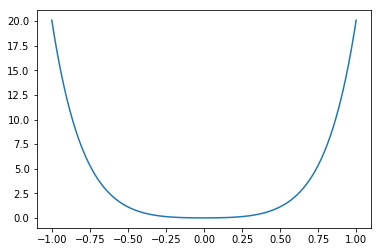

In [6]:
x = np.arange(-1.0, 1.01, 0.01)
y = np.exp(np.abs(x))**3*(x**2)
plt.plot(x,y)
plt.show()

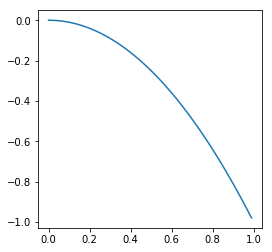

In [7]:
plt.figure(figsize=(4, 4))
x = np.arange(0, 1, 0.01)
y =  - x**2
plt.plot(x,y)
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import multiprocessing
import os
import neat
import visualize

import warnings
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:

        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        # print(genome_id, check_if_connect(genome, config))
        list_check_if_connect = check_if_connect(genome, config)
        
        # number of ture and false
        number_true = list_check_if_connect.count(True)
        number_false = list_check_if_connect.count(False)
        unconnect_ratio = number_false/(number_true + number_false)
        
        
        # no connections at all
        if (number_true == 0):
            mse = -1
        # there are connections
        else:
            sum_error = 0.0
            for xi, xo in zip(x_inputs, x_outputs):
                output = net.activate(xi)
                error = np.abs(output[0] - xo[0])
                if error > 1:
                    error = 1
                adj_error = ad_fit(error)
                sum_error -= adj_error
                # sum_error -= np.abs(output[0] - xo[0])
            mse = sum_error/samplesize
            mse -= unconnect_ratio**2

        genome.fitness = mse


def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    checkpointer = neat.Checkpointer(1000)
    p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 5000)

    return [stats,winner]

In [9]:
df=pd.read_csv('new_train_X.csv', sep=' ',header=None)
new_train_X = df.values
df=pd.read_csv('new_train_Y.csv', sep=' ',header=None)
new_train_Y = df.values

X_train_inputs = []
Y_train_outputs = []
# L = len(new_train_X)
L = len(new_train_X)
for i in range(L):
    X_train_inputs.append(tuple(new_train_X[i]))
for i in range(L):
    Y_train_outputs.append(tuple(new_train_Y[i]))

x_inputs = X_train_inputs
x_outputs = Y_train_outputs

In [10]:
samplesize = len(x_outputs)

In [11]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-sunspot")

stats_list = []
winner_list = []
for i in range(1):
    [stats,winner] = run(config_path)
    stats_list.append(stats)

    winner_list.append(winner)


 ****** Running generation 0 ****** 

Population's average fitness: -3.36658 stdev: 2.72175
Best fitness: -0.15650 - size: (1, 8) - species 1 - id 79
Average adjusted fitness: 0.550
Mean genetic distance 1.304, standard deviation 0.390
Population of 100 members in 1 species
Total extinctions: 0
Generation time: 0.313 sec

 ****** Running generation 1 ****** 

Population's average fitness: -2.15906 stdev: 3.11982
Best fitness: -0.09939 - size: (1, 8) - species 1 - id 126
Average adjusted fitness: 0.882
Mean genetic distance 1.750, standard deviation 0.591
Population of 100 members in 2 species
Total extinctions: 0
Generation time: 0.424 sec (0.369 average)

 ****** Running generation 2 ****** 

Population's average fitness: -3.26725 stdev: 4.95169
Best fitness: -0.09939 - size: (1, 8) - species 1 - id 126
Average adjusted fitness: 0.857
Mean genetic distance 1.964, standard deviation 0.498
Population of 100 members in 3 species
Total extinctions: 0
Generation time: 0.479 sec (0.406 ave

Population's average fitness: -4.26788 stdev: 6.54253
Best fitness: -0.09586 - size: (2, 8) - species 1 - id 535
Average adjusted fitness: 0.628
Mean genetic distance 2.416, standard deviation 0.663
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.395 sec (0.448 average)

 ****** Running generation 25 ****** 

Population's average fitness: -4.47868 stdev: 6.57275
Best fitness: -0.09586 - size: (2, 8) - species 1 - id 535
Average adjusted fitness: 0.674
Mean genetic distance 2.405, standard deviation 0.639
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.431 sec (0.452 average)

 ****** Running generation 26 ****** 

Population's average fitness: -3.82576 stdev: 6.29844
Best fitness: -0.09586 - size: (2, 8) - species 1 - id 535
Average adjusted fitness: 0.716
Mean genetic distance 2.416, standard deviation 0.594
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.786 sec (0.491 average)

 ****** Runni

Population's average fitness: -3.81028 stdev: 6.49667
Best fitness: -0.05928 - size: (1, 7) - species 1 - id 3343
Average adjusted fitness: 0.812
Mean genetic distance 2.451, standard deviation 0.708
Population of 103 members in 7 species
Total extinctions: 0
Generation time: 0.848 sec (0.635 average)

 ****** Running generation 49 ****** 

Population's average fitness: -4.42578 stdev: 6.82660
Best fitness: -0.05774 - size: (2, 8) - species 2 - id 4739
Average adjusted fitness: 0.772
Mean genetic distance 2.406, standard deviation 0.693
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.697 sec (0.617 average)

 ****** Running generation 50 ****** 

Population's average fitness: -2.72524 stdev: 5.16469
Best fitness: -0.05774 - size: (2, 8) - species 1 - id 4739
Average adjusted fitness: 0.896
Mean genetic distance 2.371, standard deviation 0.679
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.785 sec (0.629 average)

 ****** Run

Population's average fitness: -2.28130 stdev: 4.68403
Best fitness: -0.05774 - size: (2, 8) - species 2 - id 4739
Average adjusted fitness: 0.854
Mean genetic distance 2.718, standard deviation 0.720
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.557 sec (0.563 average)

 ****** Running generation 73 ****** 

Population's average fitness: -3.76258 stdev: 6.25070
Best fitness: -0.05774 - size: (2, 8) - species 2 - id 4739
Average adjusted fitness: 0.796
Mean genetic distance 2.695, standard deviation 0.724
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.571 sec (0.536 average)

 ****** Running generation 74 ****** 

Population's average fitness: -3.85847 stdev: 6.32940
Best fitness: -0.05774 - size: (2, 8) - species 2 - id 4739
Average adjusted fitness: 0.793
Mean genetic distance 2.658, standard deviation 0.722
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.538 sec (0.534 average)

 ****** Run

Population's average fitness: -3.56876 stdev: 6.02618
Best fitness: -0.04983 - size: (2, 8) - species 1 - id 8851
Average adjusted fitness: 0.825
Mean genetic distance 2.777, standard deviation 0.647
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.603 sec (0.580 average)

 ****** Running generation 97 ****** 

Population's average fitness: -4.04811 stdev: 6.61588
Best fitness: -0.04983 - size: (2, 8) - species 1 - id 8851
Average adjusted fitness: 0.805
Mean genetic distance 2.779, standard deviation 0.670
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.568 sec (0.581 average)

 ****** Running generation 98 ****** 

Population's average fitness: -3.29897 stdev: 5.66077
Best fitness: -0.04983 - size: (2, 8) - species 1 - id 8851
Average adjusted fitness: 0.836
Mean genetic distance 2.798, standard deviation 0.736
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.847 sec (0.606 average)

 ****** Runni

Population's average fitness: -2.93148 stdev: 5.52529
Best fitness: -0.04983 - size: (2, 8) - species 1 - id 8851
Average adjusted fitness: 0.853
Mean genetic distance 2.677, standard deviation 0.758
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.684 sec (0.636 average)

 ****** Running generation 121 ****** 

Population's average fitness: -3.59468 stdev: 5.68441
Best fitness: -0.04983 - size: (2, 8) - species 1 - id 8851
Average adjusted fitness: 0.821
Mean genetic distance 2.579, standard deviation 0.786
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.646 sec (0.639 average)

 ****** Running generation 122 ****** 

Population's average fitness: -4.33870 stdev: 6.96064
Best fitness: -0.04983 - size: (2, 8) - species 1 - id 8851
Average adjusted fitness: 0.782
Mean genetic distance 2.529, standard deviation 0.770
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.608 sec (0.639 average)

 ****** R

Population's average fitness: -2.87099 stdev: 5.44543
Best fitness: -0.03989 - size: (8, 17) - species 9 - id 12377
Average adjusted fitness: 0.859
Mean genetic distance 2.577, standard deviation 0.696
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.636 sec (0.654 average)

 ****** Running generation 145 ****** 

Population's average fitness: -4.74011 stdev: 7.30963
Best fitness: -0.03989 - size: (8, 17) - species 9 - id 12377
Average adjusted fitness: 0.772
Mean genetic distance 2.603, standard deviation 0.677
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.660 sec (0.655 average)

 ****** Running generation 146 ****** 

Population's average fitness: -5.10354 stdev: 7.43682
Best fitness: -0.03989 - size: (8, 17) - species 9 - id 12377
Average adjusted fitness: 0.752
Mean genetic distance 2.508, standard deviation 0.697
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.679 sec (0.660 average)

 *

Population's average fitness: -4.53003 stdev: 7.21574
Best fitness: -0.03560 - size: (8, 17) - species 9 - id 15088
Average adjusted fitness: 0.776
Mean genetic distance 2.461, standard deviation 0.702
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.632 sec (0.660 average)

 ****** Running generation 169 ****** 

Population's average fitness: -3.12207 stdev: 5.49513
Best fitness: -0.03560 - size: (8, 17) - species 9 - id 15088
Average adjusted fitness: 0.848
Mean genetic distance 2.436, standard deviation 0.700
Population of 97 members in 7 species
Total extinctions: 0
Generation time: 0.640 sec (0.661 average)

 ****** Running generation 170 ****** 

Population's average fitness: -3.79418 stdev: 6.17099
Best fitness: -0.03560 - size: (8, 17) - species 9 - id 15088
Average adjusted fitness: 0.814
Mean genetic distance 2.447, standard deviation 0.709
Population of 97 members in 7 species
Total extinctions: 0
Generation time: 0.620 sec (0.658 average)

 ***

Population's average fitness: -3.15271 stdev: 5.87701
Best fitness: -0.03560 - size: (8, 17) - species 9 - id 15088
Average adjusted fitness: 0.840
Mean genetic distance 2.405, standard deviation 0.615
Population of 98 members in 5 species
Total extinctions: 0
Generation time: 0.724 sec (0.869 average)

 ****** Running generation 193 ****** 

Population's average fitness: -3.99630 stdev: 6.96345
Best fitness: -0.03560 - size: (8, 17) - species 9 - id 15088
Average adjusted fitness: 0.808
Mean genetic distance 2.392, standard deviation 0.622
Population of 98 members in 5 species
Total extinctions: 0
Generation time: 0.568 sec (0.848 average)

 ****** Running generation 194 ****** 

Population's average fitness: -3.68672 stdev: 6.31429
Best fitness: -0.03560 - size: (8, 17) - species 9 - id 15088
Average adjusted fitness: 0.816
Mean genetic distance 2.401, standard deviation 0.633
Population of 100 members in 5 species
Total extinctions: 0
Generation time: 0.573 sec (0.809 average)

 ***

Population's average fitness: -3.00216 stdev: 5.82164
Best fitness: -0.03560 - size: (8, 17) - species 9 - id 15088
Average adjusted fitness: 0.863
Mean genetic distance 2.454, standard deviation 0.618
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.544 sec (0.666 average)

 ****** Running generation 217 ****** 

Population's average fitness: -5.01106 stdev: 7.57249
Best fitness: -0.03559 - size: (8, 17) - species 9 - id 20340
Average adjusted fitness: 0.762
Mean genetic distance 2.492, standard deviation 0.620
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.544 sec (0.626 average)

 ****** Running generation 218 ****** 

Population's average fitness: -3.10682 stdev: 5.60958
Best fitness: -0.03559 - size: (8, 17) - species 9 - id 20340
Average adjusted fitness: 0.848
Mean genetic distance 2.496, standard deviation 0.636
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.508 sec (0.566 average)

 ***

Population's average fitness: -3.85254 stdev: 6.62423
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.807
Mean genetic distance 2.464, standard deviation 0.668
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.609 sec (0.638 average)

 ****** Running generation 241 ****** 

Population's average fitness: -2.58868 stdev: 5.61582
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.869
Mean genetic distance 2.439, standard deviation 0.660
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.572 sec (0.633 average)

 ****** Running generation 242 ****** 

Population's average fitness: -3.45393 stdev: 6.08831
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.827
Mean genetic distance 2.433, standard deviation 0.662
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.534 sec (0.629 average)

 *

Population's average fitness: -4.30009 stdev: 6.31892
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.787
Mean genetic distance 2.587, standard deviation 0.668
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.569 sec (0.648 average)

 ****** Running generation 265 ****** 

Population's average fitness: -3.76265 stdev: 6.11051
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.810
Mean genetic distance 2.595, standard deviation 0.646
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.556 sec (0.604 average)

 ****** Running generation 266 ****** 

Population's average fitness: -3.85646 stdev: 6.74119
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.820
Mean genetic distance 2.524, standard deviation 0.618
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.544 sec (0.602 average)

 **

Population's average fitness: -2.65792 stdev: 4.57179
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.867
Mean genetic distance 2.535, standard deviation 0.698
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.608 sec (0.679 average)

 ****** Running generation 289 ****** 

Population's average fitness: -2.06502 stdev: 4.66652
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.899
Mean genetic distance 2.540, standard deviation 0.714
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.612 sec (0.683 average)

 ****** Running generation 290 ****** 

Population's average fitness: -4.71183 stdev: 7.33381
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.762
Mean genetic distance 2.539, standard deviation 0.713
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.776 sec (0.701 average)

 ***

Population's average fitness: -4.40705 stdev: 7.18123
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.795
Mean genetic distance 2.508, standard deviation 0.726
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.660 sec (0.608 average)

 ****** Running generation 313 ****** 

Population's average fitness: -3.79810 stdev: 6.92403
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.820
Mean genetic distance 2.546, standard deviation 0.714
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.658 sec (0.614 average)

 ****** Running generation 314 ****** 

Population's average fitness: -3.26279 stdev: 5.87253
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.838
Mean genetic distance 2.519, standard deviation 0.731
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.644 sec (0.621 average)

 *

Population's average fitness: -4.67870 stdev: 7.05780
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.771
Mean genetic distance 2.292, standard deviation 0.660
Population of 99 members in 5 species
Total extinctions: 0
Generation time: 0.663 sec (0.701 average)

 ****** Running generation 337 ****** 

Population's average fitness: -3.86412 stdev: 6.82645
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.801
Mean genetic distance 2.286, standard deviation 0.686
Population of 100 members in 5 species
Total extinctions: 0
Generation time: 0.631 sec (0.664 average)

 ****** Running generation 338 ****** 

Population's average fitness: -4.30990 stdev: 6.78775
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.784
Mean genetic distance 2.304, standard deviation 0.662
Population of 100 members in 5 species
Total extinctions: 0
Generation time: 0.610 sec (0.621 average)

 **

Population's average fitness: -4.27655 stdev: 6.70073
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.776
Mean genetic distance 2.206, standard deviation 0.599
Population of 102 members in 6 species
Total extinctions: 0
Generation time: 0.960 sec (0.639 average)

 ****** Running generation 361 ****** 

Population's average fitness: -3.32490 stdev: 5.86621
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.831
Mean genetic distance 2.285, standard deviation 0.533
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 1.130 sec (0.702 average)

 ****** Running generation 362 ****** 

Population's average fitness: -5.23676 stdev: 7.36177
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.743
Mean genetic distance 2.282, standard deviation 0.586
Population of 99 members in 6 species
Total extinctions: 0
Generation time: 1.014 sec (0.753 average)

 **

Population's average fitness: -3.52137 stdev: 6.31532
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.835
Mean genetic distance 2.402, standard deviation 0.619
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.527 sec (0.529 average)

 ****** Running generation 385 ****** 

Population's average fitness: -3.62185 stdev: 6.15217
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.829
Mean genetic distance 2.418, standard deviation 0.618
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.519 sec (0.532 average)

 ****** Running generation 386 ****** 

Population's average fitness: -3.72217 stdev: 6.41925
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.815
Mean genetic distance 2.405, standard deviation 0.622
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.537 sec (0.537 average)

 **

Population's average fitness: -3.84179 stdev: 6.48091
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.812
Mean genetic distance 2.479, standard deviation 0.665
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.608 sec (0.564 average)

 ****** Running generation 409 ****** 

Population's average fitness: -3.96547 stdev: 6.49287
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.806
Mean genetic distance 2.496, standard deviation 0.659
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.568 sec (0.560 average)

 ****** Running generation 410 ****** 

Population's average fitness: -2.78056 stdev: 5.72414
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.868
Mean genetic distance 2.503, standard deviation 0.678
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.570 sec (0.558 average)

 *

Population's average fitness: -2.80182 stdev: 5.15580
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.862
Mean genetic distance 2.585, standard deviation 0.694
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.566 sec (0.528 average)

 ****** Running generation 433 ****** 

Population's average fitness: -2.87413 stdev: 5.38974
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.856
Mean genetic distance 2.581, standard deviation 0.681
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.539 sec (0.532 average)

 ****** Running generation 434 ****** 

Population's average fitness: -3.60800 stdev: 6.31390
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.828
Mean genetic distance 2.593, standard deviation 0.677
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.519 sec (0.535 average)

 *

Population's average fitness: -3.23500 stdev: 5.89485
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.844
Mean genetic distance 2.517, standard deviation 0.572
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.495 sec (0.509 average)

 ****** Running generation 457 ****** 

Population's average fitness: -5.34727 stdev: 7.43767
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.743
Mean genetic distance 2.526, standard deviation 0.592
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.474 sec (0.509 average)

 ****** Running generation 458 ****** 

Population's average fitness: -2.99785 stdev: 5.59316
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.837
Mean genetic distance 2.534, standard deviation 0.657
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.484 sec (0.508 average)

 ***

Population's average fitness: -2.83920 stdev: 5.39848
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.856
Mean genetic distance 2.705, standard deviation 0.579
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.508 sec (0.499 average)

 ****** Running generation 481 ****** 

Population's average fitness: -3.00441 stdev: 5.73428
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.855
Mean genetic distance 2.713, standard deviation 0.599
Population of 100 members in 13 species
Total extinctions: 0
Generation time: 0.517 sec (0.504 average)

 ****** Running generation 482 ****** 

Population's average fitness: -2.89340 stdev: 5.26227
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.839
Mean genetic distance 2.743, standard deviation 0.561
Population of 96 members in 13 species
Total extinctions: 0
Generation time: 0.512 sec (0.505 average)



Population's average fitness: -3.52175 stdev: 6.36967
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.826
Mean genetic distance 2.673, standard deviation 0.643
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.519 sec (0.507 average)

 ****** Running generation 505 ****** 

Population's average fitness: -3.56882 stdev: 6.42423
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.823
Mean genetic distance 2.680, standard deviation 0.619
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.516 sec (0.511 average)

 ****** Running generation 506 ****** 

Population's average fitness: -2.51346 stdev: 5.19844
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.878
Mean genetic distance 2.695, standard deviation 0.606
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.530 sec (0.515 average)



Total extinctions: 0
Generation time: 1.289 sec (0.636 average)

 ****** Running generation 528 ****** 

Population's average fitness: -1.94325 stdev: 4.43522
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.900
Mean genetic distance 2.808, standard deviation 0.575
Population of 101 members in 15 species
Total extinctions: 0
Generation time: 0.934 sec (0.676 average)

 ****** Running generation 529 ****** 

Population's average fitness: -3.34447 stdev: 6.07214
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.840
Mean genetic distance 2.823, standard deviation 0.554
Population of 98 members in 15 species
Total extinctions: 0
Generation time: 1.319 sec (0.743 average)

 ****** Running generation 530 ****** 

Population's average fitness: -3.15409 stdev: 5.75159
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.847
Mean genetic distance 2.805, standard deviation 0.565


Population's average fitness: -2.50337 stdev: 5.19995
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.881
Mean genetic distance 2.853, standard deviation 0.595
Population of 101 members in 15 species
Total extinctions: 0
Generation time: 0.779 sec (0.890 average)

 ****** Running generation 553 ****** 

Population's average fitness: -2.99151 stdev: 5.51654
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.853
Mean genetic distance 2.841, standard deviation 0.590
Population of 100 members in 15 species
Total extinctions: 0
Generation time: 0.674 sec (0.886 average)

 ****** Running generation 554 ****** 

Population's average fitness: -2.75932 stdev: 5.49294
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.866
Mean genetic distance 2.841, standard deviation 0.574
Population of 102 members in 15 species
Total extinctions: 0
Generation time: 0.657 sec (0.883 average)


Population's average fitness: -3.62588 stdev: 6.38514
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.822
Mean genetic distance 2.866, standard deviation 0.613
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.853 sec (0.874 average)

 ****** Running generation 577 ****** 

Population's average fitness: -2.40173 stdev: 5.00530
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.881
Mean genetic distance 2.846, standard deviation 0.633
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 1.049 sec (0.883 average)

 ****** Running generation 578 ****** 

Population's average fitness: -2.95888 stdev: 5.47378
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.853
Mean genetic distance 2.842, standard deviation 0.627
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.708 sec (0.887 average)



Population's average fitness: -3.62153 stdev: 6.20610
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.826
Mean genetic distance 2.881, standard deviation 0.667
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 1.041 sec (0.754 average)

 ****** Running generation 601 ****** 

Population's average fitness: -2.99159 stdev: 5.79186
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.850
Mean genetic distance 2.903, standard deviation 0.640
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.010 sec (0.786 average)

 ****** Running generation 602 ****** 

Population's average fitness: -3.79585 stdev: 6.42172
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.816
Mean genetic distance 2.885, standard deviation 0.667
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.771 sec (0.793 average)



Population's average fitness: -2.77384 stdev: 5.13124
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.867
Mean genetic distance 2.812, standard deviation 0.710
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.668 sec (0.752 average)

 ****** Running generation 625 ****** 

Population's average fitness: -3.46432 stdev: 6.30769
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.828
Mean genetic distance 2.814, standard deviation 0.707
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.682 sec (0.757 average)

 ****** Running generation 626 ****** 

Population's average fitness: -2.90966 stdev: 5.81936
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.853
Mean genetic distance 2.807, standard deviation 0.704
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.623 sec (0.679 average)

 ****

Population's average fitness: -3.45224 stdev: 6.48600
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.833
Mean genetic distance 2.829, standard deviation 0.680
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.678 sec (0.747 average)

 ****** Running generation 649 ****** 

Population's average fitness: -4.10405 stdev: 6.76211
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.799
Mean genetic distance 2.812, standard deviation 0.686
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.695 sec (0.753 average)

 ****** Running generation 650 ****** 

Population's average fitness: -3.26502 stdev: 5.72788
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.838
Mean genetic distance 2.835, standard deviation 0.706
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.677 sec (0.748 average)

 ***

Population's average fitness: -3.83465 stdev: 6.59904
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.757
Mean genetic distance 2.757, standard deviation 0.620
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 1.163 sec (0.944 average)

 ****** Running generation 673 ****** 

Population's average fitness: -3.99455 stdev: 7.14975
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.752
Mean genetic distance 2.742, standard deviation 0.639
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 1.070 sec (0.971 average)

 ****** Running generation 674 ****** 

Population's average fitness: -3.55047 stdev: 6.57561
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.796
Mean genetic distance 2.754, standard deviation 0.633
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 1.378 sec (1.008 average)



Population's average fitness: -3.01298 stdev: 5.86055
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.833
Mean genetic distance 2.772, standard deviation 0.592
Population of 104 members in 13 species
Total extinctions: 0
Generation time: 0.638 sec (0.635 average)

 ****** Running generation 697 ****** 

Population's average fitness: -2.91608 stdev: 5.81955
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.854
Mean genetic distance 2.795, standard deviation 0.606
Population of 100 members in 13 species
Total extinctions: 0
Generation time: 1.054 sec (0.681 average)

 ****** Running generation 698 ****** 

Population's average fitness: -3.05407 stdev: 5.88853
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.855
Mean genetic distance 2.875, standard deviation 0.621
Population of 97 members in 13 species
Total extinctions: 0
Generation time: 0.638 sec (0.683 average)



Population's average fitness: -3.51560 stdev: 6.15610
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.826
Mean genetic distance 2.829, standard deviation 0.658
Population of 102 members in 13 species
Total extinctions: 0
Generation time: 0.644 sec (0.637 average)

 ****** Running generation 721 ****** 

Population's average fitness: -4.63215 stdev: 7.42210
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.772
Mean genetic distance 2.813, standard deviation 0.651
Population of 105 members in 13 species
Total extinctions: 0
Generation time: 0.641 sec (0.635 average)

 ****** Running generation 722 ****** 

Population's average fitness: -2.80948 stdev: 5.76149
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.866
Mean genetic distance 2.796, standard deviation 0.677
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.658 sec (0.632 average)


Population's average fitness: -3.79198 stdev: 6.61241
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.816
Mean genetic distance 2.635, standard deviation 0.662
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.658 sec (0.628 average)

 ****** Running generation 745 ****** 

Population's average fitness: -3.01890 stdev: 6.24447
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.846
Mean genetic distance 2.545, standard deviation 0.653
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.656 sec (0.633 average)

 ****** Running generation 746 ****** 

Population's average fitness: -3.39464 stdev: 6.29738
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.832
Mean genetic distance 2.581, standard deviation 0.633
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 1.032 sec (0.675 average)

 **

Population's average fitness: -3.26528 stdev: 5.86773
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.835
Mean genetic distance 2.809, standard deviation 0.652
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 1.113 sec (0.837 average)

 ****** Running generation 769 ****** 

Population's average fitness: -3.89513 stdev: 6.23510
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.806
Mean genetic distance 2.781, standard deviation 0.618
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 1.529 sec (0.917 average)

 ****** Running generation 770 ****** 

Population's average fitness: -2.69680 stdev: 5.59484
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.890
Mean genetic distance 2.702, standard deviation 0.586
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 1.600 sec (1.005 average)

 *

Population's average fitness: -3.54892 stdev: 6.16745
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.823
Mean genetic distance 2.678, standard deviation 0.655
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.739 sec (0.732 average)

 ****** Running generation 793 ****** 

Population's average fitness: -3.09446 stdev: 5.74008
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.848
Mean genetic distance 2.696, standard deviation 0.600
Population of 104 members in 10 species
Total extinctions: 0
Generation time: 0.719 sec (0.732 average)

 ****** Running generation 794 ****** 

Population's average fitness: -2.93252 stdev: 6.08888
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.859
Mean genetic distance 2.699, standard deviation 0.611
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.748 sec (0.735 average)


Population's average fitness: -3.53390 stdev: 6.53881
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.819
Mean genetic distance 2.695, standard deviation 0.663
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.685 sec (0.700 average)

 ****** Running generation 817 ****** 

Population's average fitness: -2.95182 stdev: 5.65614
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.854
Mean genetic distance 2.713, standard deviation 0.653
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.747 sec (0.704 average)

 ****** Running generation 818 ****** 

Population's average fitness: -3.35515 stdev: 6.34531
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.730
Mean genetic distance 2.708, standard deviation 0.719
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.691 sec (0.701 average)

 ****

Population's average fitness: -3.52909 stdev: 6.28227
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.823
Mean genetic distance 2.789, standard deviation 0.680
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.790 sec (0.820 average)

 ****** Running generation 841 ****** 

Population's average fitness: -3.21068 stdev: 6.44597
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.843
Mean genetic distance 2.795, standard deviation 0.688
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.775 sec (0.820 average)

 ****** Running generation 842 ****** 

Population's average fitness: -3.90239 stdev: 6.42229
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.804
Mean genetic distance 2.779, standard deviation 0.694
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.778 sec (0.820 average)

 ***

Population's average fitness: -3.27228 stdev: 6.30580
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.837
Mean genetic distance 2.739, standard deviation 0.730
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.833 sec (0.812 average)

 ****** Running generation 865 ****** 

Population's average fitness: -3.75090 stdev: 6.46618
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.817
Mean genetic distance 2.772, standard deviation 0.737
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.825 sec (0.814 average)

 ****** Running generation 866 ****** 

Population's average fitness: -4.94248 stdev: 7.79735
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.757
Mean genetic distance 2.764, standard deviation 0.725
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.835 sec (0.819 average)

 **

Population's average fitness: -3.44954 stdev: 6.52047
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.822
Mean genetic distance 2.786, standard deviation 0.635
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.855 sec (0.882 average)

 ****** Running generation 889 ****** 

Population's average fitness: -3.44375 stdev: 6.59401
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.827
Mean genetic distance 2.770, standard deviation 0.658
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.906 sec (0.887 average)

 ****** Running generation 890 ****** 

Population's average fitness: -2.76396 stdev: 5.48161
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.864
Mean genetic distance 2.780, standard deviation 0.661
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.886 sec (0.886 average)

 **

Population's average fitness: -3.68655 stdev: 6.15627
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.832
Mean genetic distance 2.654, standard deviation 0.601
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.755 sec (0.857 average)

 ****** Running generation 913 ****** 

Population's average fitness: -4.45977 stdev: 7.20034
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.779
Mean genetic distance 2.674, standard deviation 0.604
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.767 sec (0.833 average)

 ****** Running generation 914 ****** 

Population's average fitness: -3.62322 stdev: 6.37999
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.816
Mean genetic distance 2.677, standard deviation 0.586
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.769 sec (0.822 average)

 ***

Population's average fitness: -3.50878 stdev: 6.47738
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.824
Mean genetic distance 2.768, standard deviation 0.605
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.815 sec (0.827 average)

 ****** Running generation 937 ****** 

Population's average fitness: -3.68412 stdev: 6.63366
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.818
Mean genetic distance 2.776, standard deviation 0.606
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.869 sec (0.830 average)

 ****** Running generation 938 ****** 

Population's average fitness: -2.37228 stdev: 5.35966
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.884
Mean genetic distance 2.782, standard deviation 0.601
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.832 sec (0.820 average)

 ***

Population's average fitness: -3.18993 stdev: 6.04404
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.844
Mean genetic distance 2.803, standard deviation 0.648
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.809 sec (1.054 average)

 ****** Running generation 961 ****** 

Population's average fitness: -3.29970 stdev: 5.93520
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.838
Mean genetic distance 2.802, standard deviation 0.691
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.816 sec (1.052 average)

 ****** Running generation 962 ****** 

Population's average fitness: -4.18823 stdev: 6.79160
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.792
Mean genetic distance 2.800, standard deviation 0.674
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 1.664 sec (1.106 average)

 *

Population's average fitness: -4.26411 stdev: 6.75058
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.804
Mean genetic distance 2.777, standard deviation 0.613
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.890 sec (0.978 average)

 ****** Running generation 985 ****** 

Population's average fitness: -2.95458 stdev: 5.48182
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.861
Mean genetic distance 2.779, standard deviation 0.628
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.834 sec (0.916 average)

 ****** Running generation 986 ****** 

Population's average fitness: -3.42173 stdev: 6.32347
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.828
Mean genetic distance 2.788, standard deviation 0.643
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.811 sec (0.875 average)


Population's average fitness: -1.99544 stdev: 3.95621
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.900
Mean genetic distance 2.752, standard deviation 0.650
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.796 sec (0.825 average)

 ****** Running generation 1009 ****** 

Population's average fitness: -3.17253 stdev: 5.60127
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.846
Mean genetic distance 2.752, standard deviation 0.680
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.850 sec (0.827 average)

 ****** Running generation 1010 ****** 

Population's average fitness: -3.00664 stdev: 5.84301
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.851
Mean genetic distance 2.769, standard deviation 0.685
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.013 sec (0.843 average)



Population's average fitness: -3.67748 stdev: 6.24733
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.815
Mean genetic distance 2.686, standard deviation 0.645
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.801 sec (0.825 average)

 ****** Running generation 1033 ****** 

Population's average fitness: -3.68275 stdev: 6.23950
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.823
Mean genetic distance 2.675, standard deviation 0.615
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.827 sec (0.819 average)

 ****** Running generation 1034 ****** 

Population's average fitness: -4.12095 stdev: 6.67615
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.790
Mean genetic distance 2.684, standard deviation 0.602
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.823 sec (0.821 average)



Population's average fitness: -3.61779 stdev: 6.14892
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.820
Mean genetic distance 2.768, standard deviation 0.641
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.742 sec (0.767 average)

 ****** Running generation 1057 ****** 

Population's average fitness: -4.23037 stdev: 6.65150
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.793
Mean genetic distance 2.772, standard deviation 0.596
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.767 sec (0.766 average)

 ****** Running generation 1058 ****** 

Population's average fitness: -2.83718 stdev: 5.50656
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.859
Mean genetic distance 2.760, standard deviation 0.599
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.749 sec (0.761 average

Total extinctions: 0
Generation time: 1.475 sec (0.924 average)

 ****** Running generation 1080 ****** 

Population's average fitness: -2.91487 stdev: 5.74421
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.862
Mean genetic distance 2.757, standard deviation 0.613
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.912 sec (0.934 average)

 ****** Running generation 1081 ****** 

Population's average fitness: -2.63421 stdev: 5.31068
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.868
Mean genetic distance 2.745, standard deviation 0.633
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.845 sec (0.939 average)

 ****** Running generation 1082 ****** 

Population's average fitness: -2.68884 stdev: 5.13708
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.866
Mean genetic distance 2.761, standard deviation 0.

Population's average fitness: -3.25272 stdev: 6.31756
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.851
Mean genetic distance 2.642, standard deviation 0.658
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.899 sec (0.956 average)

 ****** Running generation 1105 ****** 

Population's average fitness: -4.87766 stdev: 7.54509
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.786
Mean genetic distance 2.676, standard deviation 0.671
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 1.158 sec (0.986 average)

 ****** Running generation 1106 ****** 

Population's average fitness: -2.62235 stdev: 5.26097
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.870
Mean genetic distance 2.665, standard deviation 0.670
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.791 sec (0.981 average)

 **

Population's average fitness: -2.90320 stdev: 5.48980
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.857
Mean genetic distance 2.709, standard deviation 0.629
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.805 sec (0.865 average)

 ****** Running generation 1129 ****** 

Population's average fitness: -2.29261 stdev: 4.57186
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.886
Mean genetic distance 2.716, standard deviation 0.629
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.799 sec (0.843 average)

 ****** Running generation 1130 ****** 

Population's average fitness: -3.64911 stdev: 6.78991
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.820
Mean genetic distance 2.723, standard deviation 0.650
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.775 sec (0.836 average)

 

Population's average fitness: -1.93532 stdev: 4.50883
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.904
Mean genetic distance 2.829, standard deviation 0.626
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.828 sec (0.777 average)

 ****** Running generation 1153 ****** 

Population's average fitness: -2.55177 stdev: 4.88432
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.873
Mean genetic distance 2.831, standard deviation 0.634
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.792 sec (0.784 average)

 ****** Running generation 1154 ****** 

Population's average fitness: -2.57899 stdev: 5.51194
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.872
Mean genetic distance 2.812, standard deviation 0.643
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.769 sec (0.786 average)

Population's average fitness: -3.75286 stdev: 6.84993
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.816
Mean genetic distance 2.823, standard deviation 0.624
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.801 sec (0.807 average)

 ****** Running generation 1177 ****** 

Population's average fitness: -3.28215 stdev: 5.99335
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.834
Mean genetic distance 2.814, standard deviation 0.625
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.794 sec (0.804 average)

 ****** Running generation 1178 ****** 

Population's average fitness: -5.20432 stdev: 7.77313
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.734
Mean genetic distance 2.817, standard deviation 0.664
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.777 sec (0.799 average)


Population's average fitness: -3.46540 stdev: 6.29348
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.826
Mean genetic distance 2.686, standard deviation 0.697
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.817 sec (0.846 average)

 ****** Running generation 1201 ****** 

Population's average fitness: -3.65653 stdev: 6.15002
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.819
Mean genetic distance 2.696, standard deviation 0.679
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.806 sec (0.838 average)

 ****** Running generation 1202 ****** 

Population's average fitness: -3.34414 stdev: 6.00182
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.832
Mean genetic distance 2.713, standard deviation 0.660
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.772 sec (0.827 average)



Total extinctions: 0
Generation time: 0.832 sec (0.790 average)
Saving checkpoint to neat-checkpoint-1223

 ****** Running generation 1224 ****** 

Population's average fitness: -4.62340 stdev: 7.27330
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.774
Mean genetic distance 2.789, standard deviation 0.705
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.747 sec (0.787 average)

 ****** Running generation 1225 ****** 

Population's average fitness: -3.33021 stdev: 5.86862
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.837
Mean genetic distance 2.785, standard deviation 0.710
Population of 97 members in 7 species
Total extinctions: 0
Generation time: 0.761 sec (0.790 average)

 ****** Running generation 1226 ****** 

Population's average fitness: -3.80551 stdev: 6.66777
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.816
Mean genetic

Population's average fitness: -2.49645 stdev: 4.93196
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.878
Mean genetic distance 2.801, standard deviation 0.667
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.827 sec (0.828 average)

 ****** Running generation 1249 ****** 

Population's average fitness: -3.48846 stdev: 6.35950
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.829
Mean genetic distance 2.799, standard deviation 0.681
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.886 sec (0.838 average)

 ****** Running generation 1250 ****** 

Population's average fitness: -2.70493 stdev: 5.28557
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.863
Mean genetic distance 2.793, standard deviation 0.675
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.837 sec (0.839 average)

Population's average fitness: -4.45654 stdev: 6.93896
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.779
Mean genetic distance 2.840, standard deviation 0.683
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.888 sec (0.791 average)

 ****** Running generation 1273 ****** 

Population's average fitness: -3.03607 stdev: 5.84129
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.853
Mean genetic distance 2.822, standard deviation 0.657
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.809 sec (0.790 average)

 ****** Running generation 1274 ****** 

Population's average fitness: -2.93311 stdev: 5.66516
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.852
Mean genetic distance 2.829, standard deviation 0.660
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.800 sec (0.792 average)



Population's average fitness: -2.56469 stdev: 5.40744
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.874
Mean genetic distance 2.777, standard deviation 0.678
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.302 sec (0.776 average)

 ****** Running generation 1297 ****** 

Population's average fitness: -3.15652 stdev: 5.84859
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.841
Mean genetic distance 2.804, standard deviation 0.669
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 1.255 sec (0.829 average)

 ****** Running generation 1298 ****** 

Population's average fitness: -3.13307 stdev: 6.01583
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.842
Mean genetic distance 2.817, standard deviation 0.676
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.733 sec (0.928 average)


Population's average fitness: -2.20261 stdev: 4.73535
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.892
Mean genetic distance 2.763, standard deviation 0.707
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.763 sec (0.961 average)

 ****** Running generation 1321 ****** 

Population's average fitness: -3.10987 stdev: 5.45163
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.847
Mean genetic distance 2.790, standard deviation 0.686
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.791 sec (0.967 average)

 ****** Running generation 1322 ****** 

Population's average fitness: -3.74365 stdev: 6.28529
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.815
Mean genetic distance 2.776, standard deviation 0.715
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.824 sec (0.966 average)


Population's average fitness: -2.64214 stdev: 5.03229
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.872
Mean genetic distance 2.742, standard deviation 0.652
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.736 sec (1.157 average)

 ****** Running generation 1345 ****** 

Population's average fitness: -3.18219 stdev: 5.75861
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.842
Mean genetic distance 2.712, standard deviation 0.658
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.750 sec (1.063 average)

 ****** Running generation 1346 ****** 

Population's average fitness: -3.58534 stdev: 6.33148
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.825
Mean genetic distance 2.726, standard deviation 0.647
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.705 sec (0.971 average)

 **

Population's average fitness: -3.54501 stdev: 6.67754
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.825
Mean genetic distance 2.710, standard deviation 0.664
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.683 sec (0.734 average)

 ****** Running generation 1369 ****** 

Population's average fitness: -3.51611 stdev: 5.58937
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.824
Mean genetic distance 2.721, standard deviation 0.646
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.709 sec (0.731 average)

 ****** Running generation 1370 ****** 

Population's average fitness: -3.40033 stdev: 6.49852
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.832
Mean genetic distance 2.719, standard deviation 0.648
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.722 sec (0.723 average)

 

Population's average fitness: -5.27973 stdev: 7.72649
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.738
Mean genetic distance 2.742, standard deviation 0.659
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.753 sec (0.774 average)

 ****** Running generation 1393 ****** 

Population's average fitness: -3.47582 stdev: 5.88066
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.812
Mean genetic distance 2.690, standard deviation 0.711
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.715 sec (0.715 average)

 ****** Running generation 1394 ****** 

Population's average fitness: -3.17077 stdev: 5.76738
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.841
Mean genetic distance 2.703, standard deviation 0.697
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.781 sec (0.719 average)



Population's average fitness: -2.96100 stdev: 5.61706
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.852
Mean genetic distance 2.736, standard deviation 0.654
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.746 sec (0.762 average)

 ****** Running generation 1417 ****** 

Population's average fitness: -4.16123 stdev: 6.75677
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.804
Mean genetic distance 2.752, standard deviation 0.652
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.751 sec (0.755 average)

 ****** Running generation 1418 ****** 

Population's average fitness: -3.75606 stdev: 6.31859
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.806
Mean genetic distance 2.766, standard deviation 0.668
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.732 sec (0.754 average)



Population's average fitness: -3.01978 stdev: 5.42041
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.836
Mean genetic distance 2.789, standard deviation 0.684
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.789 sec (0.797 average)

 ****** Running generation 1441 ****** 

Population's average fitness: -2.59881 stdev: 4.70760
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.869
Mean genetic distance 2.787, standard deviation 0.677
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.792 sec (0.799 average)

 ****** Running generation 1442 ****** 

Population's average fitness: -2.85284 stdev: 5.42317
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.860
Mean genetic distance 2.808, standard deviation 0.649
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.821 sec (0.803 average

Population's average fitness: -3.22888 stdev: 5.72755
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.840
Mean genetic distance 2.792, standard deviation 0.693
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.819 sec (0.843 average)

 ****** Running generation 1465 ****** 

Population's average fitness: -2.99047 stdev: 5.93555
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.853
Mean genetic distance 2.784, standard deviation 0.699
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.846 sec (0.839 average)

 ****** Running generation 1466 ****** 

Population's average fitness: -3.28746 stdev: 5.73897
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.836
Mean genetic distance 2.785, standard deviation 0.703
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.819 sec (0.831 average)

 

Population's average fitness: -2.93403 stdev: 5.71436
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.850
Mean genetic distance 2.705, standard deviation 0.571
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 1.360 sec (1.108 average)

 ****** Running generation 1489 ****** 

Population's average fitness: -2.27340 stdev: 4.67418
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.873
Mean genetic distance 2.716, standard deviation 0.603
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.969 sec (1.129 average)

 ****** Running generation 1490 ****** 

Population's average fitness: -3.52174 stdev: 6.42498
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.831
Mean genetic distance 2.689, standard deviation 0.615
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 1.025 sec (1.154 average)

 


Population's average fitness: -2.98425 stdev: 6.18995
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.838
Mean genetic distance 2.727, standard deviation 0.621
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 1.560 sec (1.030 average)

 ****** Running generation 1513 ****** 

Population's average fitness: -3.46785 stdev: 6.06861
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.831
Mean genetic distance 2.759, standard deviation 0.622
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 1.753 sec (1.082 average)

 ****** Running generation 1514 ****** 

Population's average fitness: -3.74356 stdev: 6.09699
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.815
Mean genetic distance 2.751, standard deviation 0.638
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 1.929 sec (1.176 average)

 

Population's average fitness: -3.52244 stdev: 6.38693
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.829
Mean genetic distance 2.760, standard deviation 0.662
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.877 sec (0.884 average)

 ****** Running generation 1537 ****** 

Population's average fitness: -2.52917 stdev: 5.16204
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.876
Mean genetic distance 2.791, standard deviation 0.650
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.878 sec (0.885 average)

 ****** Running generation 1538 ****** 

Population's average fitness: -4.96828 stdev: 7.41034
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.752
Mean genetic distance 2.803, standard deviation 0.633
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.884 sec (0.888 average

Population's average fitness: -2.96673 stdev: 6.05833
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.856
Mean genetic distance 2.747, standard deviation 0.595
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.881 sec (0.926 average)

 ****** Running generation 1561 ****** 

Population's average fitness: -2.87403 stdev: 5.71369
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.855
Mean genetic distance 2.736, standard deviation 0.601
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.922 sec (0.928 average)

 ****** Running generation 1562 ****** 

Population's average fitness: -3.00829 stdev: 5.96339
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.845
Mean genetic distance 2.726, standard deviation 0.627
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.907 sec (0.925 average

Population's average fitness: -3.13655 stdev: 6.27688
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.845
Mean genetic distance 2.690, standard deviation 0.625
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.943 sec (0.917 average)

 ****** Running generation 1585 ****** 

Population's average fitness: -2.49112 stdev: 5.27865
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.871
Mean genetic distance 2.697, standard deviation 0.653
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.940 sec (0.919 average)

 ****** Running generation 1586 ****** 

Population's average fitness: -2.18481 stdev: 4.70529
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.895
Mean genetic distance 2.724, standard deviation 0.653
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.920 sec (0.925 average)



Population's average fitness: -3.15722 stdev: 5.51904
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.845
Mean genetic distance 2.633, standard deviation 0.626
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.879 sec (0.907 average)

 ****** Running generation 1609 ****** 

Population's average fitness: -3.70770 stdev: 6.62538
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.821
Mean genetic distance 2.630, standard deviation 0.628
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.853 sec (0.902 average)

 ****** Running generation 1610 ****** 

Population's average fitness: -4.03409 stdev: 6.67550
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.804
Mean genetic distance 2.672, standard deviation 0.649
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.900 sec (0.903 average)

 **

Population's average fitness: -3.78914 stdev: 6.69087
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.808
Mean genetic distance 2.571, standard deviation 0.640
Population of 103 members in 7 species
Total extinctions: 0
Generation time: 0.796 sec (0.815 average)

 ****** Running generation 1633 ****** 

Population's average fitness: -3.64220 stdev: 6.42594
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.820
Mean genetic distance 2.603, standard deviation 0.614
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.815 sec (0.809 average)

 ****** Running generation 1634 ****** 

Population's average fitness: -3.45731 stdev: 6.24005
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.828
Mean genetic distance 2.577, standard deviation 0.622
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.782 sec (0.803 average)



Population's average fitness: -4.10478 stdev: 6.76845
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.798
Mean genetic distance 2.522, standard deviation 0.644
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.720 sec (0.708 average)

 ****** Running generation 1657 ****** 

Population's average fitness: -2.61012 stdev: 5.23127
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.867
Mean genetic distance 2.533, standard deviation 0.637
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.772 sec (0.718 average)

 ****** Running generation 1658 ****** 

Population's average fitness: -3.60731 stdev: 6.34430
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.819
Mean genetic distance 2.547, standard deviation 0.606
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.745 sec (0.722 average)



Population's average fitness: -2.78716 stdev: 5.66979
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.862
Mean genetic distance 2.644, standard deviation 0.642
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.703 sec (0.727 average)

 ****** Running generation 1681 ****** 

Population's average fitness: -4.55695 stdev: 6.60359
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.774
Mean genetic distance 2.659, standard deviation 0.664
Population of 97 members in 7 species
Total extinctions: 0
Generation time: 0.668 sec (0.711 average)

 ****** Running generation 1682 ****** 

Population's average fitness: -2.23620 stdev: 4.75881
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.893
Mean genetic distance 2.640, standard deviation 0.644
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.653 sec (0.700 average)

 **

Population's average fitness: -2.27918 stdev: 4.78041
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.885
Mean genetic distance 2.797, standard deviation 0.656
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.735 sec (0.716 average)

 ****** Running generation 1705 ****** 

Population's average fitness: -1.50726 stdev: 3.52424
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.926
Mean genetic distance 2.796, standard deviation 0.672
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.781 sec (0.725 average)

 ****** Running generation 1706 ****** 

Population's average fitness: -2.41818 stdev: 4.56322
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.878
Mean genetic distance 2.815, standard deviation 0.654
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.739 sec (0.730 average)

 

Population's average fitness: -4.64039 stdev: 7.17296
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.769
Mean genetic distance 2.754, standard deviation 0.697
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.791 sec (0.782 average)

 ****** Running generation 1729 ****** 

Population's average fitness: -2.53381 stdev: 5.44283
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.873
Mean genetic distance 2.746, standard deviation 0.715
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.786 sec (0.785 average)

 ****** Running generation 1730 ****** 

Population's average fitness: -3.91166 stdev: 6.48604
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.799
Mean genetic distance 2.763, standard deviation 0.704
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.763 sec (0.775 average)

 *

Population's average fitness: -3.21956 stdev: 6.21601
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.846
Mean genetic distance 2.845, standard deviation 0.686
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.908 sec (0.824 average)

 ****** Running generation 1753 ****** 

Population's average fitness: -3.19591 stdev: 6.17652
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.838
Mean genetic distance 2.844, standard deviation 0.692
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.855 sec (0.826 average)

 ****** Running generation 1754 ****** 

Population's average fitness: -4.78513 stdev: 7.31799
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.767
Mean genetic distance 2.820, standard deviation 0.692
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.806 sec (0.824 average)

 **

Generation time: 0.923 sec (0.869 average)

 ****** Running generation 1776 ****** 

Population's average fitness: -3.95642 stdev: 6.71202
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.809
Mean genetic distance 2.856, standard deviation 0.722
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.894 sec (0.875 average)

 ****** Running generation 1777 ****** 

Population's average fitness: -2.61928 stdev: 5.43965
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.867
Mean genetic distance 2.839, standard deviation 0.722
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.870 sec (0.876 average)

 ****** Running generation 1778 ****** 

Population's average fitness: -3.60511 stdev: 6.34335
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.822
Mean genetic distance 2.836, standard deviation 0.724
Population of 101

Population's average fitness: -3.61862 stdev: 6.34710
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.814
Mean genetic distance 2.794, standard deviation 0.647
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 1.007 sec (0.917 average)

 ****** Running generation 1801 ****** 

Population's average fitness: -3.15056 stdev: 5.81157
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.842
Mean genetic distance 2.804, standard deviation 0.668
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.911 sec (0.921 average)

 ****** Running generation 1802 ****** 

Population's average fitness: -2.87726 stdev: 5.17339
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.854
Mean genetic distance 2.805, standard deviation 0.658
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.978 sec (0.930 average)


Population's average fitness: -4.38788 stdev: 6.78847
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.778
Mean genetic distance 2.707, standard deviation 0.699
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.975 sec (0.997 average)

 ****** Running generation 1825 ****** 

Population's average fitness: -4.48938 stdev: 6.82579
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.764
Mean genetic distance 2.725, standard deviation 0.685
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.987 sec (0.995 average)

 ****** Running generation 1826 ****** 

Population's average fitness: -4.32412 stdev: 6.93393
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.788
Mean genetic distance 2.731, standard deviation 0.688
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.990 sec (0.995 average)



Population's average fitness: -3.36089 stdev: 5.95259
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.832
Mean genetic distance 2.577, standard deviation 0.641
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.877 sec (0.917 average)

 ****** Running generation 1849 ****** 

Population's average fitness: -3.50790 stdev: 5.62858
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.824
Mean genetic distance 2.578, standard deviation 0.674
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.841 sec (0.909 average)

 ****** Running generation 1850 ****** 

Population's average fitness: -4.49875 stdev: 6.81828
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.781
Mean genetic distance 2.608, standard deviation 0.633
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.860 sec (0.901 average)

 *

Population's average fitness: -2.49570 stdev: 4.65564
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.878
Mean genetic distance 2.609, standard deviation 0.551
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.924 sec (0.853 average)

 ****** Running generation 1873 ****** 

Population's average fitness: -3.33009 stdev: 5.44108
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.836
Mean genetic distance 2.585, standard deviation 0.581
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.838 sec (0.853 average)

 ****** Running generation 1874 ****** 

Population's average fitness: -4.69787 stdev: 6.93491
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.768
Mean genetic distance 2.588, standard deviation 0.633
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.853 sec (0.848 average)



Population's average fitness: -3.03759 stdev: 6.03455
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.852
Mean genetic distance 2.604, standard deviation 0.599
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.789 sec (0.802 average)

 ****** Running generation 1897 ****** 

Population's average fitness: -2.36948 stdev: 4.59845
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.884
Mean genetic distance 2.579, standard deviation 0.613
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.793 sec (0.800 average)

 ****** Running generation 1898 ****** 

Population's average fitness: -2.88701 stdev: 5.23206
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.859
Mean genetic distance 2.586, standard deviation 0.596
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.864 sec (0.803 average)



Population's average fitness: -2.49967 stdev: 5.08974
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.869
Mean genetic distance 2.666, standard deviation 0.579
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.827 sec (0.821 average)

 ****** Running generation 1921 ****** 

Population's average fitness: -3.73811 stdev: 6.45654
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.828
Mean genetic distance 2.658, standard deviation 0.615
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.801 sec (0.815 average)

 ****** Running generation 1922 ****** 

Population's average fitness: -5.29652 stdev: 7.24830
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.738
Mean genetic distance 2.646, standard deviation 0.592
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.853 sec (0.821 average)



Population's average fitness: -5.05721 stdev: 7.11256
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.749
Mean genetic distance 2.722, standard deviation 0.638
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.790 sec (0.863 average)

 ****** Running generation 1945 ****** 

Population's average fitness: -4.38301 stdev: 6.88682
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.773
Mean genetic distance 2.716, standard deviation 0.636
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.822 sec (0.860 average)

 ****** Running generation 1946 ****** 

Population's average fitness: -3.75231 stdev: 6.36648
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.807
Mean genetic distance 2.733, standard deviation 0.621
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.818 sec (0.859 average)


Population's average fitness: -3.30755 stdev: 5.90565
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.826
Mean genetic distance 2.685, standard deviation 0.644
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.737 sec (0.795 average)

 ****** Running generation 1969 ****** 

Population's average fitness: -2.16691 stdev: 4.27920
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.890
Mean genetic distance 2.685, standard deviation 0.631
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.699 sec (0.782 average)

 ****** Running generation 1970 ****** 

Population's average fitness: -3.26881 stdev: 5.61314
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.835
Mean genetic distance 2.687, standard deviation 0.637
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.805 sec (0.782 average)

 

Population's average fitness: -3.78335 stdev: 6.38770
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.810
Mean genetic distance 2.687, standard deviation 0.635
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.636 sec (0.690 average)

 ****** Running generation 1993 ****** 

Population's average fitness: -4.05973 stdev: 6.59650
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.807
Mean genetic distance 2.708, standard deviation 0.645
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.668 sec (0.689 average)

 ****** Running generation 1994 ****** 

Population's average fitness: -3.67026 stdev: 6.37334
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.815
Mean genetic distance 2.723, standard deviation 0.592
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.737 sec (0.692 average)



Population's average fitness: -3.90458 stdev: 6.09344
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.808
Mean genetic distance 2.962, standard deviation 0.637
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.708 sec (0.700 average)

 ****** Running generation 2017 ****** 

Population's average fitness: -4.37318 stdev: 6.50672
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.730
Mean genetic distance 2.944, standard deviation 0.639
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.740 sec (0.706 average)

 ****** Running generation 2018 ****** 

Population's average fitness: -3.91754 stdev: 6.70829
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.757
Mean genetic distance 2.957, standard deviation 0.661
Population of 104 members in 12 species
Total extinctions: 0
Generation time: 0.726 sec (0.702 average

Population's average fitness: -2.91381 stdev: 5.26613
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.857
Mean genetic distance 2.900, standard deviation 0.750
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.830 sec (0.817 average)

 ****** Running generation 2041 ****** 

Population's average fitness: -2.32833 stdev: 4.38182
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.886
Mean genetic distance 2.929, standard deviation 0.723
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.863 sec (0.822 average)

 ****** Running generation 2042 ****** 

Population's average fitness: -4.67380 stdev: 7.18446
Best fitness: -0.02178 - size: (9, 18) - species 9 - id 20892
Average adjusted fitness: 0.767
Mean genetic distance 2.880, standard deviation 0.746
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.851 sec (0.826 average)



Population's average fitness: -4.49548 stdev: 6.80446
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.777
Mean genetic distance 2.834, standard deviation 0.710
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.824 sec (0.976 average)

 ****** Running generation 2065 ****** 

Population's average fitness: -3.84704 stdev: 5.65293
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.811
Mean genetic distance 2.839, standard deviation 0.706
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.822 sec (0.967 average)

 ****** Running generation 2066 ****** 

Population's average fitness: -3.99960 stdev: 6.08780
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.788
Mean genetic distance 2.859, standard deviation 0.693
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.823 sec (0.942 average

Population's average fitness: -3.42781 stdev: 6.18674
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.831
Mean genetic distance 2.696, standard deviation 0.637
Population of 99 members in 6 species
Total extinctions: 0
Generation time: 0.787 sec (0.944 average)

 ****** Running generation 2089 ****** 

Population's average fitness: -3.56426 stdev: 6.17187
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.826
Mean genetic distance 2.673, standard deviation 0.636
Population of 99 members in 6 species
Total extinctions: 0
Generation time: 0.821 sec (0.938 average)

 ****** Running generation 2090 ****** 

Population's average fitness: -3.79401 stdev: 6.06233
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.812
Mean genetic distance 2.671, standard deviation 0.651
Population of 99 members in 6 species
Total extinctions: 0
Generation time: 0.839 sec (0.934 average

Population's average fitness: -2.64396 stdev: 5.20638
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.871
Mean genetic distance 2.844, standard deviation 0.628
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.792 sec (0.836 average)

 ****** Running generation 2113 ****** 

Population's average fitness: -2.24313 stdev: 4.68832
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.889
Mean genetic distance 2.828, standard deviation 0.624
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.844 sec (0.842 average)

 ****** Running generation 2114 ****** 

Population's average fitness: -3.69630 stdev: 6.21443
Best fitness: -0.01886 - size: (5, 12) - species 16 - id 187627
Average adjusted fitness: 0.821
Mean genetic distance 2.828, standard deviation 0.642
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.840 sec (0.844 ave

Generation time: 0.908 sec (0.788 average)

 ****** Running generation 2136 ****** 

Population's average fitness: -4.24772 stdev: 6.83642
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.790
Mean genetic distance 2.856, standard deviation 0.666
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.852 sec (0.792 average)

 ****** Running generation 2137 ****** 

Population's average fitness: -3.84532 stdev: 6.95427
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.806
Mean genetic distance 2.828, standard deviation 0.668
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.826 sec (0.799 average)

 ****** Running generation 2138 ****** 

Population's average fitness: -2.79100 stdev: 5.35250
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.796
Mean genetic distance 2.831, standard deviation 0.679
Populatio

Population's average fitness: -2.67240 stdev: 5.42056
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.869
Mean genetic distance 2.860, standard deviation 0.665
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.787 sec (0.806 average)

 ****** Running generation 2161 ****** 

Population's average fitness: -2.55425 stdev: 5.39471
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.868
Mean genetic distance 2.814, standard deviation 0.672
Population of 96 members in 10 species
Total extinctions: 0
Generation time: 0.881 sec (0.816 average)

 ****** Running generation 2162 ****** 

Population's average fitness: -2.40900 stdev: 5.33179
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.881
Mean genetic distance 2.839, standard deviation 0.675
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.802 sec (0.815 

Population's average fitness: -4.27455 stdev: 7.07441
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.791
Mean genetic distance 2.770, standard deviation 0.710
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.802 sec (0.814 average)

 ****** Running generation 2185 ****** 

Population's average fitness: -4.90479 stdev: 7.39202
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.761
Mean genetic distance 2.766, standard deviation 0.702
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.786 sec (0.803 average)

 ****** Running generation 2186 ****** 

Population's average fitness: -3.07924 stdev: 5.39661
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.849
Mean genetic distance 2.757, standard deviation 0.683
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.786 sec (0.800 a

Population's average fitness: -3.75979 stdev: 5.91744
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.815
Mean genetic distance 2.697, standard deviation 0.670
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.817 sec (0.835 average)

 ****** Running generation 2209 ****** 

Population's average fitness: -4.63567 stdev: 7.18287
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.746
Mean genetic distance 2.775, standard deviation 0.679
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.892 sec (0.847 average)

 ****** Running generation 2210 ****** 

Population's average fitness: -2.84144 stdev: 5.05763
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.854
Mean genetic distance 2.720, standard deviation 0.698
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.793 sec (0.843 ave

Population's average fitness: -1.92812 stdev: 4.46903
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.907
Mean genetic distance 2.752, standard deviation 0.666
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.873 sec (0.858 average)

 ****** Running generation 2233 ****** 

Population's average fitness: -2.72481 stdev: 5.17802
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.867
Mean genetic distance 2.765, standard deviation 0.651
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.861 sec (0.861 average)

 ****** Running generation 2234 ****** 

Population's average fitness: -2.91281 stdev: 5.86992
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.855
Mean genetic distance 2.809, standard deviation 0.661
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.856 sec (0.867 av

Population's average fitness: -2.79616 stdev: 5.89198
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.863
Mean genetic distance 2.737, standard deviation 0.702
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.802 sec (0.844 average)

 ****** Running generation 2257 ****** 

Population's average fitness: -2.90053 stdev: 5.83879
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.856
Mean genetic distance 2.755, standard deviation 0.673
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.848 sec (0.843 average)

 ****** Running generation 2258 ****** 

Population's average fitness: -3.38101 stdev: 5.89558
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.829
Mean genetic distance 2.783, standard deviation 0.643
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.859 sec (0.845 ave

Population's average fitness: -2.98969 stdev: 5.70299
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.850
Mean genetic distance 2.718, standard deviation 0.623
Population of 97 members in 7 species
Total extinctions: 0
Generation time: 0.931 sec (0.880 average)
Saving checkpoint to neat-checkpoint-2280

 ****** Running generation 2281 ****** 

Population's average fitness: -3.92233 stdev: 6.74513
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.807
Mean genetic distance 2.701, standard deviation 0.630
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.879 sec (0.887 average)

 ****** Running generation 2282 ****** 

Population's average fitness: -2.68175 stdev: 5.15711
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.865
Mean genetic distance 2.660, standard deviation 0.689
Population of 99 members in 7 species
Total extinctions

Population's average fitness: -2.26885 stdev: 4.86789
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.890
Mean genetic distance 2.752, standard deviation 0.575
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.887 sec (0.832 average)

 ****** Running generation 2305 ****** 

Population's average fitness: -3.02576 stdev: 5.57938
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.846
Mean genetic distance 2.741, standard deviation 0.596
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.875 sec (0.839 average)

 ****** Running generation 2306 ****** 

Population's average fitness: -3.66072 stdev: 6.09168
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.823
Mean genetic distance 2.741, standard deviation 0.623
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.940 sec (0.849 av

Population's average fitness: -2.57254 stdev: 4.89532
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.872
Mean genetic distance 2.750, standard deviation 0.644
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.786 sec (0.823 average)

 ****** Running generation 2329 ****** 

Population's average fitness: -2.53192 stdev: 4.91435
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.873
Mean genetic distance 2.715, standard deviation 0.633
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.769 sec (0.822 average)

 ****** Running generation 2330 ****** 

Population's average fitness: -3.00069 stdev: 5.67828
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.860
Mean genetic distance 2.746, standard deviation 0.615
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.828 sec (0.814 ave

Population's average fitness: -2.98448 stdev: 5.42590
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.851
Mean genetic distance 2.825, standard deviation 0.664
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.744 sec (0.765 average)

 ****** Running generation 2353 ****** 

Population's average fitness: -4.34563 stdev: 6.37235
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.770
Mean genetic distance 2.803, standard deviation 0.606
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.781 sec (0.767 average)

 ****** Running generation 2354 ****** 

Population's average fitness: -3.90280 stdev: 6.06208
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.812
Mean genetic distance 2.815, standard deviation 0.640
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.758 sec (0.766 av

Population's average fitness: -4.01106 stdev: 6.70093
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.801
Mean genetic distance 2.633, standard deviation 0.550
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.993 sec (0.853 average)

 ****** Running generation 2377 ****** 

Population's average fitness: -2.93305 stdev: 5.46670
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.858
Mean genetic distance 2.626, standard deviation 0.577
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.835 sec (0.859 average)

 ****** Running generation 2378 ****** 

Population's average fitness: -2.68121 stdev: 5.11473
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.863
Mean genetic distance 2.640, standard deviation 0.567
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.845 sec (0.861 av

Population's average fitness: -3.20383 stdev: 5.93233
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.841
Mean genetic distance 2.617, standard deviation 0.644
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.883 sec (0.862 average)

 ****** Running generation 2401 ****** 

Population's average fitness: -4.44762 stdev: 6.99843
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.779
Mean genetic distance 2.635, standard deviation 0.624
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.869 sec (0.862 average)

 ****** Running generation 2402 ****** 

Population's average fitness: -4.07061 stdev: 6.66395
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.797
Mean genetic distance 2.647, standard deviation 0.607
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.873 sec (0.866 av

Population's average fitness: -3.78296 stdev: 6.05870
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.815
Mean genetic distance 2.760, standard deviation 0.701
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.802 sec (0.827 average)

 ****** Running generation 2425 ****** 

Population's average fitness: -3.17104 stdev: 5.81510
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.844
Mean genetic distance 2.770, standard deviation 0.719
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.791 sec (0.821 average)

 ****** Running generation 2426 ****** 

Population's average fitness: -3.44437 stdev: 5.93393
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.828
Mean genetic distance 2.739, standard deviation 0.668
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.803 sec (0.806 av

Population's average fitness: -3.29274 stdev: 6.12217
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.832
Mean genetic distance 2.913, standard deviation 0.641
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.874 sec (0.784 average)

 ****** Running generation 2449 ****** 

Population's average fitness: -3.04690 stdev: 5.49367
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.852
Mean genetic distance 2.883, standard deviation 0.647
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.786 sec (0.783 average)

 ****** Running generation 2450 ****** 

Population's average fitness: -3.19772 stdev: 6.29310
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.842
Mean genetic distance 2.909, standard deviation 0.670
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.781 sec (0.78

Population's average fitness: -2.42190 stdev: 5.01897
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.878
Mean genetic distance 2.874, standard deviation 0.707
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.754 sec (0.948 average)

 ****** Running generation 2473 ****** 

Population's average fitness: -3.43441 stdev: 6.35018
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.826
Mean genetic distance 2.885, standard deviation 0.696
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.979 sec (0.970 average)

 ****** Running generation 2474 ****** 

Population's average fitness: -3.32707 stdev: 5.70528
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.841
Mean genetic distance 2.873, standard deviation 0.687
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 1.261 sec (1.016

Population's average fitness: -3.76293 stdev: 6.14565
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.814
Mean genetic distance 2.829, standard deviation 0.694
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.910 sec (1.088 average)

 ****** Running generation 2497 ****** 

Population's average fitness: -2.52670 stdev: 5.18639
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.874
Mean genetic distance 2.818, standard deviation 0.679
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 1.513 sec (1.151 average)

 ****** Running generation 2498 ****** 

Population's average fitness: -2.39808 stdev: 4.80418
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.880
Mean genetic distance 2.852, standard deviation 0.687
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 1.001 sec (1.151 ave

Population's average fitness: -3.88913 stdev: 6.60135
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.804
Mean genetic distance 2.822, standard deviation 0.679
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 1.598 sec (1.028 average)

 ****** Running generation 2521 ****** 

Population's average fitness: -2.74911 stdev: 5.40069
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.866
Mean genetic distance 2.886, standard deviation 0.648
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.231 sec (1.070 average)

 ****** Running generation 2522 ****** 

Population's average fitness: -2.77568 stdev: 4.92781
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.861
Mean genetic distance 2.906, standard deviation 0.638
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.973 sec (1.08

Population's average fitness: -2.94182 stdev: 5.28785
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.859
Mean genetic distance 2.819, standard deviation 0.659
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.841 sec (0.998 average)

 ****** Running generation 2545 ****** 

Population's average fitness: -3.41622 stdev: 5.97459
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.829
Mean genetic distance 2.833, standard deviation 0.632
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.850 sec (0.991 average)

 ****** Running generation 2546 ****** 

Population's average fitness: -3.48020 stdev: 5.98432
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.827
Mean genetic distance 2.861, standard deviation 0.650
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.765 sec (0.984 a

Population's average fitness: -3.25805 stdev: 5.87784
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.839
Mean genetic distance 2.768, standard deviation 0.665
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.866 sec (1.038 average)

 ****** Running generation 2569 ****** 

Population's average fitness: -3.53520 stdev: 6.19387
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.825
Mean genetic distance 2.773, standard deviation 0.663
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.980 sec (0.997 average)

 ****** Running generation 2570 ****** 

Population's average fitness: -3.59593 stdev: 6.15382
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.819
Mean genetic distance 2.752, standard deviation 0.670
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 1.175 sec (0.967 a

Population's average fitness: -3.33896 stdev: 5.82302
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.836
Mean genetic distance 2.725, standard deviation 0.588
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.971 sec (0.978 average)

 ****** Running generation 2593 ****** 

Population's average fitness: -2.94643 stdev: 5.55663
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.849
Mean genetic distance 2.707, standard deviation 0.607
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.982 sec (0.982 average)

 ****** Running generation 2594 ****** 

Population's average fitness: -3.97877 stdev: 6.61869
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.805
Mean genetic distance 2.688, standard deviation 0.586
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.981 sec (0.98

Population's average fitness: -2.92709 stdev: 5.65756
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.856
Mean genetic distance 2.662, standard deviation 0.594
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.919 sec (1.059 average)

 ****** Running generation 2617 ****** 

Population's average fitness: -3.13655 stdev: 5.38491
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.856
Mean genetic distance 2.667, standard deviation 0.580
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.862 sec (1.017 average)

 ****** Running generation 2618 ****** 

Population's average fitness: -3.00526 stdev: 5.53714
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.843
Mean genetic distance 2.706, standard deviation 0.620
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.918 sec (0.993 av

Population's average fitness: -3.75267 stdev: 6.75378
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.810
Mean genetic distance 2.623, standard deviation 0.595
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.887 sec (0.987 average)

 ****** Running generation 2641 ****** 

Population's average fitness: -2.88125 stdev: 5.31134
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.855
Mean genetic distance 2.638, standard deviation 0.598
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.817 sec (0.967 average)

 ****** Running generation 2642 ****** 

Population's average fitness: -2.54451 stdev: 5.10486
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.873
Mean genetic distance 2.635, standard deviation 0.613
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.815 sec (0.936 aver

Total extinctions: 0
Generation time: 1.071 sec (1.247 average)

 ****** Running generation 2664 ****** 

Population's average fitness: -5.30233 stdev: 7.61873
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.740
Mean genetic distance 2.664, standard deviation 0.588
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.951 sec (1.223 average)

 ****** Running generation 2665 ****** 

Population's average fitness: -2.68952 stdev: 5.50003
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.876
Mean genetic distance 2.670, standard deviation 0.591
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.969 sec (1.210 average)

 ****** Running generation 2666 ****** 

Population's average fitness: -4.09993 stdev: 6.88131
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.785
Mean genetic distance 2.655, standard devia

Population's average fitness: -2.25231 stdev: 4.88743
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.884
Mean genetic distance 2.692, standard deviation 0.603
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.972 sec (0.940 average)

 ****** Running generation 2689 ****** 

Population's average fitness: -2.61597 stdev: 5.24807
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.874
Mean genetic distance 2.664, standard deviation 0.589
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.875 sec (0.924 average)

 ****** Running generation 2690 ****** 

Population's average fitness: -2.53110 stdev: 4.97215
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.875
Mean genetic distance 2.680, standard deviation 0.571
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.932 sec (0.922 av

Population's average fitness: -3.12241 stdev: 5.75587
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.850
Mean genetic distance 2.654, standard deviation 0.609
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 1.225 sec (0.967 average)

 ****** Running generation 2713 ****** 

Population's average fitness: -3.67673 stdev: 6.18794
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.819
Mean genetic distance 2.655, standard deviation 0.611
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.593 sec (1.030 average)

 ****** Running generation 2714 ****** 

Population's average fitness: -2.57922 stdev: 4.72077
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.875
Mean genetic distance 2.657, standard deviation 0.595
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 1.502 sec (1.087 a

Population's average fitness: -3.15984 stdev: 5.65634
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.845
Mean genetic distance 2.716, standard deviation 0.589
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.911 sec (0.935 average)

 ****** Running generation 2737 ****** 

Population's average fitness: -4.24052 stdev: 6.69297
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.792
Mean genetic distance 2.712, standard deviation 0.597
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.991 sec (0.943 average)

 ****** Running generation 2738 ****** 

Population's average fitness: -2.99258 stdev: 5.44997
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.852
Mean genetic distance 2.727, standard deviation 0.609
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.985 sec (0.944 aver

Population's average fitness: -2.17418 stdev: 4.70204
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.893
Mean genetic distance 2.641, standard deviation 0.658
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.936 sec (0.928 average)

 ****** Running generation 2761 ****** 

Population's average fitness: -2.40627 stdev: 4.83801
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.876
Mean genetic distance 2.661, standard deviation 0.617
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.855 sec (0.915 average)

 ****** Running generation 2762 ****** 

Population's average fitness: -3.74780 stdev: 6.34118
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.814
Mean genetic distance 2.656, standard deviation 0.617
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.895 sec (0.912 av

Population's average fitness: -3.17104 stdev: 5.88598
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.859
Mean genetic distance 2.674, standard deviation 0.581
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.846 sec (0.789 average)

 ****** Running generation 2785 ****** 

Population's average fitness: -2.87398 stdev: 5.43510
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.853
Mean genetic distance 2.691, standard deviation 0.576
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.819 sec (0.790 average)

 ****** Running generation 2786 ****** 

Population's average fitness: -3.47083 stdev: 6.33525
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.827
Mean genetic distance 2.697, standard deviation 0.555
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.795 sec (0.784 a

Population's average fitness: -2.43487 stdev: 4.96055
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.816
Mean genetic distance 2.804, standard deviation 0.579
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.728 sec (0.754 average)

 ****** Running generation 2809 ****** 

Population's average fitness: -2.99251 stdev: 6.01912
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.826
Mean genetic distance 2.804, standard deviation 0.586
Population of 96 members in 12 species
Total extinctions: 0
Generation time: 0.711 sec (0.748 average)

 ****** Running generation 2810 ****** 

Population's average fitness: -3.07416 stdev: 6.05373
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.822
Mean genetic distance 2.785, standard deviation 0.587
Population of 98 members in 12 species
Total extinctions: 0
Generation time: 0.697 sec (0.743 a

Population's average fitness: -4.53062 stdev: 6.98864
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.773
Mean genetic distance 2.861, standard deviation 0.625
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.761 sec (0.782 average)

 ****** Running generation 2833 ****** 

Population's average fitness: -3.74622 stdev: 6.49722
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.814
Mean genetic distance 2.880, standard deviation 0.640
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.728 sec (0.776 average)

 ****** Running generation 2834 ****** 

Population's average fitness: -3.44098 stdev: 6.54370
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.831
Mean genetic distance 2.836, standard deviation 0.661
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.742 sec (0.770 a

Population's average fitness: -3.18367 stdev: 5.77296
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.843
Mean genetic distance 2.824, standard deviation 0.672
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.760 sec (0.778 average)

 ****** Running generation 2857 ****** 

Population's average fitness: -3.43432 stdev: 5.99181
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.829
Mean genetic distance 2.822, standard deviation 0.671
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.770 sec (0.776 average)

 ****** Running generation 2858 ****** 

Population's average fitness: -3.32295 stdev: 5.83899
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.836
Mean genetic distance 2.860, standard deviation 0.703
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.730 sec (0.769

Population's average fitness: -3.74601 stdev: 5.97143
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.814
Mean genetic distance 2.764, standard deviation 0.653
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.867 sec (0.781 average)

 ****** Running generation 2881 ****** 

Population's average fitness: -2.62087 stdev: 4.90022
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.868
Mean genetic distance 2.754, standard deviation 0.640
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.737 sec (0.778 average)

 ****** Running generation 2882 ****** 

Population's average fitness: -2.70890 stdev: 5.48794
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.864
Mean genetic distance 2.746, standard deviation 0.632
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.715 sec (0.773 aver

Population's average fitness: -3.61946 stdev: 6.08299
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.821
Mean genetic distance 2.747, standard deviation 0.651
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.750 sec (0.749 average)

 ****** Running generation 2905 ****** 

Population's average fitness: -3.78579 stdev: 6.43224
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.811
Mean genetic distance 2.738, standard deviation 0.644
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.748 sec (0.749 average)

 ****** Running generation 2906 ****** 

Population's average fitness: -3.80290 stdev: 6.34950
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.807
Mean genetic distance 2.683, standard deviation 0.655
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.749 sec (0.750 a

Population's average fitness: -3.30837 stdev: 6.08433
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.834
Mean genetic distance 2.792, standard deviation 0.641
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.751 sec (0.734 average)

 ****** Running generation 2929 ****** 

Population's average fitness: -4.93767 stdev: 7.09284
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.755
Mean genetic distance 2.768, standard deviation 0.660
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.743 sec (0.738 average)

 ****** Running generation 2930 ****** 

Population's average fitness: -2.92384 stdev: 5.69956
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.854
Mean genetic distance 2.771, standard deviation 0.667
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.770 sec (0.743 av

Population's average fitness: -4.25511 stdev: 6.85540
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.795
Mean genetic distance 2.828, standard deviation 0.702
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.697 sec (0.699 average)

 ****** Running generation 2953 ****** 

Population's average fitness: -2.60323 stdev: 5.09669
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.855
Mean genetic distance 2.853, standard deviation 0.686
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.678 sec (0.694 average)

 ****** Running generation 2954 ****** 

Population's average fitness: -4.29641 stdev: 6.64405
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.782
Mean genetic distance 2.846, standard deviation 0.645
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.687 sec (0.691 aver

Population's average fitness: -3.38309 stdev: 6.19914
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.817
Mean genetic distance 2.802, standard deviation 0.704
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.714 sec (0.714 average)

 ****** Running generation 2977 ****** 

Population's average fitness: -3.99520 stdev: 6.45169
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.799
Mean genetic distance 2.813, standard deviation 0.694
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.760 sec (0.718 average)

 ****** Running generation 2978 ****** 

Population's average fitness: -2.99613 stdev: 5.67349
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.849
Mean genetic distance 2.780, standard deviation 0.682
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.745 sec (0.722 a

Population's average fitness: -3.40211 stdev: 6.11292
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.820
Mean genetic distance 2.802, standard deviation 0.686
Population of 103 members in 7 species
Total extinctions: 0
Generation time: 1.111 sec (0.900 average)

 ****** Running generation 3001 ****** 

Population's average fitness: -3.00588 stdev: 5.54861
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.849
Mean genetic distance 2.833, standard deviation 0.693
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 1.487 sec (0.975 average)

 ****** Running generation 3002 ****** 

Population's average fitness: -3.53092 stdev: 5.98229
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.823
Mean genetic distance 2.805, standard deviation 0.751
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 1.422 sec (1.047 av

Population's average fitness: -3.41356 stdev: 5.70944
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.832
Mean genetic distance 2.912, standard deviation 0.722
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.740 sec (0.770 average)

 ****** Running generation 3025 ****** 

Population's average fitness: -3.21568 stdev: 5.45074
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.844
Mean genetic distance 2.904, standard deviation 0.704
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.726 sec (0.764 average)

 ****** Running generation 3026 ****** 

Population's average fitness: -2.80224 stdev: 5.38015
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.861
Mean genetic distance 2.924, standard deviation 0.720
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.743 sec (0.760 a

Population's average fitness: -3.70590 stdev: 5.91329
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.811
Mean genetic distance 2.911, standard deviation 0.725
Population of 104 members in 9 species
Total extinctions: 0
Generation time: 0.749 sec (0.756 average)

 ****** Running generation 3049 ****** 

Population's average fitness: -2.92087 stdev: 5.65364
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.852
Mean genetic distance 2.855, standard deviation 0.714
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.733 sec (0.756 average)

 ****** Running generation 3050 ****** 

Population's average fitness: -3.05373 stdev: 5.76993
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.855
Mean genetic distance 2.815, standard deviation 0.782
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.729 sec (0.755 av

Population's average fitness: -2.84655 stdev: 5.31293
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.849
Mean genetic distance 2.847, standard deviation 0.729
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.817 sec (0.790 average)

 ****** Running generation 3073 ****** 

Population's average fitness: -3.49115 stdev: 6.11813
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.834
Mean genetic distance 2.835, standard deviation 0.717
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.829 sec (0.795 average)

 ****** Running generation 3074 ****** 

Population's average fitness: -3.85539 stdev: 6.31534
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.806
Mean genetic distance 2.854, standard deviation 0.716
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.808 sec (0.800 a

Population's average fitness: -3.31880 stdev: 5.78355
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.829
Mean genetic distance 2.751, standard deviation 0.691
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.766 sec (0.769 average)

 ****** Running generation 3097 ****** 

Population's average fitness: -4.03360 stdev: 6.37998
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.802
Mean genetic distance 2.762, standard deviation 0.683
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.775 sec (0.768 average)

 ****** Running generation 3098 ****** 

Population's average fitness: -3.00684 stdev: 5.33494
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.850
Mean genetic distance 2.755, standard deviation 0.689
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.759 sec (0.765 aver

Population's average fitness: -3.56829 stdev: 6.12800
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.827
Mean genetic distance 2.873, standard deviation 0.700
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.774 sec (0.796 average)

 ****** Running generation 3121 ****** 

Population's average fitness: -4.45057 stdev: 7.24824
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.780
Mean genetic distance 2.838, standard deviation 0.701
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.783 sec (0.795 average)

 ****** Running generation 3122 ****** 

Population's average fitness: -3.91283 stdev: 6.39309
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.806
Mean genetic distance 2.815, standard deviation 0.690
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.766 sec (0.789 aver

Population's average fitness: -3.91075 stdev: 6.20479
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.803
Mean genetic distance 2.863, standard deviation 0.717
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.816 sec (0.783 average)

 ****** Running generation 3145 ****** 

Population's average fitness: -3.15165 stdev: 5.81371
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.845
Mean genetic distance 2.860, standard deviation 0.718
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.802 sec (0.783 average)

 ****** Running generation 3146 ****** 

Population's average fitness: -3.45875 stdev: 6.42929
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.834
Mean genetic distance 2.868, standard deviation 0.722
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.903 sec (0.794 av

Population's average fitness: -3.30067 stdev: 6.33772
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.837
Mean genetic distance 2.669, standard deviation 0.604
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.809 sec (0.818 average)

 ****** Running generation 3169 ****** 

Population's average fitness: -2.51731 stdev: 5.01009
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.869
Mean genetic distance 2.648, standard deviation 0.641
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.831 sec (0.817 average)

 ****** Running generation 3170 ****** 

Population's average fitness: -3.30532 stdev: 6.34327
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.837
Mean genetic distance 2.664, standard deviation 0.637
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.869 sec (0.824 ave

Population's average fitness: -4.51890 stdev: 7.31369
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.771
Mean genetic distance 2.774, standard deviation 0.595
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.794 sec (0.777 average)

 ****** Running generation 3193 ****** 

Population's average fitness: -3.19248 stdev: 5.74563
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.839
Mean genetic distance 2.812, standard deviation 0.628
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.872 sec (0.786 average)

 ****** Running generation 3194 ****** 

Population's average fitness: -2.82080 stdev: 5.87056
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.852
Mean genetic distance 2.770, standard deviation 0.674
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.859 sec (0.793 ave

Population's average fitness: -3.69595 stdev: 6.62706
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.810
Mean genetic distance 2.778, standard deviation 0.676
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.775 sec (0.800 average)

 ****** Running generation 3217 ****** 

Population's average fitness: -2.07847 stdev: 4.17528
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.895
Mean genetic distance 2.766, standard deviation 0.680
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.795 sec (0.803 average)

 ****** Running generation 3218 ****** 

Population's average fitness: -3.79212 stdev: 6.65219
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.811
Mean genetic distance 2.763, standard deviation 0.667
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.783 sec (0.804 ave

Population's average fitness: -3.01831 stdev: 5.55781
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.850
Mean genetic distance 2.813, standard deviation 0.659
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.787 sec (0.808 average)

 ****** Running generation 3241 ****** 

Population's average fitness: -2.85175 stdev: 5.39843
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.856
Mean genetic distance 2.776, standard deviation 0.681
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.776 sec (0.807 average)

 ****** Running generation 3242 ****** 

Population's average fitness: -3.56095 stdev: 6.57913
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.819
Mean genetic distance 2.730, standard deviation 0.661
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.765 sec (0.802 av

Population's average fitness: -2.25833 stdev: 4.95757
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.890
Mean genetic distance 2.793, standard deviation 0.633
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.748 sec (0.786 average)

 ****** Running generation 3265 ****** 

Population's average fitness: -2.62679 stdev: 5.42547
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.870
Mean genetic distance 2.805, standard deviation 0.667
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.745 sec (0.784 average)

 ****** Running generation 3266 ****** 

Population's average fitness: -2.67880 stdev: 5.44684
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.864
Mean genetic distance 2.789, standard deviation 0.670
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.749 sec (0.774 a

Population's average fitness: -2.97670 stdev: 5.93327
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.857
Mean genetic distance 2.841, standard deviation 0.620
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.796 sec (0.811 average)

 ****** Running generation 3289 ****** 

Population's average fitness: -3.28038 stdev: 5.98280
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.845
Mean genetic distance 2.854, standard deviation 0.636
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.821 sec (0.814 average)

 ****** Running generation 3290 ****** 

Population's average fitness: -3.54335 stdev: 6.53107
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.822
Mean genetic distance 2.860, standard deviation 0.666
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.794 sec (0.818

Population's average fitness: -3.15186 stdev: 5.57714
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.848
Mean genetic distance 2.885, standard deviation 0.676
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.832 sec (0.807 average)

 ****** Running generation 3313 ****** 

Population's average fitness: -3.00616 stdev: 5.42034
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.859
Mean genetic distance 2.856, standard deviation 0.695
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.827 sec (0.809 average)

 ****** Running generation 3314 ****** 

Population's average fitness: -4.18067 stdev: 6.98772
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.794
Mean genetic distance 2.889, standard deviation 0.675
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.918 sec (0.822

Population's average fitness: -3.53518 stdev: 6.06845
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.824
Mean genetic distance 2.733, standard deviation 0.612
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.855 sec (0.899 average)

 ****** Running generation 3337 ****** 

Population's average fitness: -2.78906 stdev: 5.12175
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.861
Mean genetic distance 2.745, standard deviation 0.655
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.833 sec (0.900 average)

 ****** Running generation 3338 ****** 

Population's average fitness: -3.61690 stdev: 6.20948
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.818
Mean genetic distance 2.742, standard deviation 0.642
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.868 sec (0.895 av

Population's average fitness: -2.21649 stdev: 4.18160
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.889
Mean genetic distance 2.725, standard deviation 0.628
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.836 sec (0.849 average)

 ****** Running generation 3361 ****** 

Population's average fitness: -3.25028 stdev: 5.65079
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.834
Mean genetic distance 2.728, standard deviation 0.637
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.916 sec (0.855 average)

 ****** Running generation 3362 ****** 

Population's average fitness: -3.86798 stdev: 5.71641
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.807
Mean genetic distance 2.733, standard deviation 0.619
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.885 sec (0.856 ave

Population's average fitness: -3.10593 stdev: 5.66318
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.839
Mean genetic distance 2.731, standard deviation 0.658
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.903 sec (0.931 average)

 ****** Running generation 3385 ****** 

Population's average fitness: -3.81760 stdev: 6.22786
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.806
Mean genetic distance 2.718, standard deviation 0.663
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.997 sec (0.918 average)

 ****** Running generation 3386 ****** 

Population's average fitness: -1.83362 stdev: 3.63014
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.910
Mean genetic distance 2.725, standard deviation 0.672
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.899 sec (0.903 av

Population's average fitness: -3.51419 stdev: 5.78302
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.826
Mean genetic distance 2.743, standard deviation 0.684
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.886 sec (0.920 average)

 ****** Running generation 3409 ****** 

Population's average fitness: -2.62667 stdev: 4.78170
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.869
Mean genetic distance 2.743, standard deviation 0.669
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.899 sec (0.923 average)

 ****** Running generation 3410 ****** 

Population's average fitness: -3.78091 stdev: 6.23682
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.812
Mean genetic distance 2.754, standard deviation 0.680
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.853 sec (0.908 av

Population's average fitness: -3.25282 stdev: 5.93841
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.840
Mean genetic distance 2.688, standard deviation 0.630
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.852 sec (0.892 average)

 ****** Running generation 3433 ****** 

Population's average fitness: -2.78934 stdev: 5.40557
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.870
Mean genetic distance 2.647, standard deviation 0.624
Population of 103 members in 7 species
Total extinctions: 0
Generation time: 0.859 sec (0.889 average)

 ****** Running generation 3434 ****** 

Population's average fitness: -3.08477 stdev: 5.81261
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.847
Mean genetic distance 2.656, standard deviation 0.647
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.849 sec (0.881 av

Population's average fitness: -2.93018 stdev: 5.20053
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.856
Mean genetic distance 2.613, standard deviation 0.636
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.909 sec (0.913 average)

 ****** Running generation 3457 ****** 

Population's average fitness: -1.59692 stdev: 3.34943
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.912
Mean genetic distance 2.648, standard deviation 0.633
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.886 sec (0.908 average)

 ****** Running generation 3458 ****** 

Population's average fitness: -3.02885 stdev: 5.95498
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.852
Mean genetic distance 2.641, standard deviation 0.641
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.917 sec (0.911 a

Population's average fitness: -3.28022 stdev: 5.95159
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.836
Mean genetic distance 2.688, standard deviation 0.670
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.992 sec (0.915 average)

 ****** Running generation 3481 ****** 

Population's average fitness: -3.34899 stdev: 5.74384
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.832
Mean genetic distance 2.663, standard deviation 0.690
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.923 sec (0.916 average)

 ****** Running generation 3482 ****** 

Population's average fitness: -4.57049 stdev: 7.14304
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.773
Mean genetic distance 2.672, standard deviation 0.691
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.838 sec (0.909 a

Population's average fitness: -3.33879 stdev: 5.93942
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.825
Mean genetic distance 2.763, standard deviation 0.619
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.947 sec (0.907 average)

 ****** Running generation 3505 ****** 

Population's average fitness: -2.36294 stdev: 4.98381
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.890
Mean genetic distance 2.722, standard deviation 0.603
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.815 sec (0.898 average)

 ****** Running generation 3506 ****** 

Population's average fitness: -4.21762 stdev: 7.16732
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.794
Mean genetic distance 2.693, standard deviation 0.619
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.837 sec (0.891 av

Population's average fitness: -2.92038 stdev: 5.67864
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.853
Mean genetic distance 2.781, standard deviation 0.653
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.832 sec (0.867 average)

 ****** Running generation 3529 ****** 

Population's average fitness: -3.42523 stdev: 5.70005
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.828
Mean genetic distance 2.769, standard deviation 0.641
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.880 sec (0.867 average)

 ****** Running generation 3530 ****** 

Population's average fitness: -4.24342 stdev: 6.85450
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.791
Mean genetic distance 2.779, standard deviation 0.661
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.884 sec (0.867 a

Population's average fitness: -5.32708 stdev: 7.55837
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.736
Mean genetic distance 2.684, standard deviation 0.686
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.762 sec (0.788 average)

 ****** Running generation 3553 ****** 

Population's average fitness: -4.29988 stdev: 6.87274
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.789
Mean genetic distance 2.694, standard deviation 0.677
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.917 sec (0.798 average)

 ****** Running generation 3554 ****** 

Population's average fitness: -4.02187 stdev: 6.66241
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.804
Mean genetic distance 2.700, standard deviation 0.687
Population of 98 members in 6 species
Total extinctions: 0
Generation time: 0.807 sec (0.796 av

Population's average fitness: -3.58526 stdev: 6.20494
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.819
Mean genetic distance 2.723, standard deviation 0.640
Population of 99 members in 7 species
Total extinctions: 0
Generation time: 0.691 sec (0.729 average)

 ****** Running generation 3577 ****** 

Population's average fitness: -2.62210 stdev: 5.59122
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.872
Mean genetic distance 2.738, standard deviation 0.647
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.703 sec (0.727 average)

 ****** Running generation 3578 ****** 

Population's average fitness: -2.46766 stdev: 4.47277
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.805
Mean genetic distance 2.755, standard deviation 0.670
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.739 sec (0.729 ave

Population's average fitness: -3.59883 stdev: 6.53110
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.825
Mean genetic distance 2.745, standard deviation 0.666
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.766 sec (0.781 average)

 ****** Running generation 3601 ****** 

Population's average fitness: -2.60747 stdev: 5.19101
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.867
Mean genetic distance 2.775, standard deviation 0.650
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.746 sec (0.779 average)

 ****** Running generation 3602 ****** 

Population's average fitness: -3.25028 stdev: 5.85709
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.840
Mean genetic distance 2.770, standard deviation 0.625
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.716 sec (0.769 aver

Population's average fitness: -4.10600 stdev: 6.42003
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.797
Mean genetic distance 2.874, standard deviation 0.648
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.768 sec (0.906 average)

 ****** Running generation 3625 ****** 

Population's average fitness: -3.52879 stdev: 6.10701
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.814
Mean genetic distance 2.892, standard deviation 0.644
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.751 sec (0.908 average)

 ****** Running generation 3626 ****** 

Population's average fitness: -2.79376 stdev: 5.35161
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.859
Mean genetic distance 2.885, standard deviation 0.650
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.837 sec (0.918 

Mean genetic distance 2.867, standard deviation 0.656
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.815 sec (0.699 average)

 ****** Running generation 3648 ****** 

Population's average fitness: -3.40378 stdev: 6.16195
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.829
Mean genetic distance 2.845, standard deviation 0.636
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.832 sec (0.702 average)

 ****** Running generation 3649 ****** 

Population's average fitness: -4.63245 stdev: 7.38492
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.768
Mean genetic distance 2.856, standard deviation 0.622
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.687 sec (0.696 average)

 ****** Running generation 3650 ****** 

Population's average fitness: -3.60033 stdev: 6.60077
Best fitness: -0.01886 - size: (5, 12) - spec

Population's average fitness: -2.43229 stdev: 5.04751
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.880
Mean genetic distance 2.751, standard deviation 0.714
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.835 sec (0.747 average)
Saving checkpoint to neat-checkpoint-3672

 ****** Running generation 3673 ****** 

Population's average fitness: -4.70474 stdev: 7.20751
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.791
Mean genetic distance 2.779, standard deviation 0.716
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 1.042 sec (0.775 average)

 ****** Running generation 3674 ****** 

Population's average fitness: -3.24554 stdev: 5.98435
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.841
Mean genetic distance 2.785, standard deviation 0.696
Population of 97 members in 8 species
Total extinctions

Population's average fitness: -3.09234 stdev: 5.68910
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.846
Mean genetic distance 2.814, standard deviation 0.734
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.786 sec (0.873 average)

 ****** Running generation 3697 ****** 

Population's average fitness: -3.12089 stdev: 5.51093
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.850
Mean genetic distance 2.849, standard deviation 0.715
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.779 sec (0.845 average)

 ****** Running generation 3698 ****** 

Population's average fitness: -2.41612 stdev: 5.15307
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.879
Mean genetic distance 2.832, standard deviation 0.701
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.732 sec (0.808 a

Population's average fitness: -2.98840 stdev: 5.72438
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.854
Mean genetic distance 2.797, standard deviation 0.694
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 1.716 sec (1.071 average)

 ****** Running generation 3721 ****** 

Population's average fitness: -4.14956 stdev: 6.75237
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.791
Mean genetic distance 2.786, standard deviation 0.679
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 1.102 sec (1.105 average)

 ****** Running generation 3722 ****** 

Population's average fitness: -3.50134 stdev: 5.89873
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.834
Mean genetic distance 2.784, standard deviation 0.655
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 1.117 sec (1.142 

Population's average fitness: -3.80505 stdev: 6.65702
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.811
Mean genetic distance 2.793, standard deviation 0.674
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.691 sec (0.725 average)

 ****** Running generation 3745 ****** 

Population's average fitness: -4.36353 stdev: 7.15646
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.802
Mean genetic distance 2.717, standard deviation 0.669
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.676 sec (0.720 average)

 ****** Running generation 3746 ****** 

Population's average fitness: -2.64059 stdev: 5.48026
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.866
Mean genetic distance 2.717, standard deviation 0.701
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.690 sec (0.717 av

Population's average fitness: -2.99055 stdev: 5.52300
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.847
Mean genetic distance 2.781, standard deviation 0.656
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.684 sec (0.667 average)

 ****** Running generation 3769 ****** 

Population's average fitness: -4.15490 stdev: 6.87430
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.787
Mean genetic distance 2.762, standard deviation 0.684
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.655 sec (0.669 average)

 ****** Running generation 3770 ****** 

Population's average fitness: -3.67355 stdev: 5.95074
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.810
Mean genetic distance 2.739, standard deviation 0.677
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.614 sec (0.663 av

Population's average fitness: -3.27077 stdev: 5.83165
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.836
Mean genetic distance 2.742, standard deviation 0.657
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.728 sec (0.631 average)

 ****** Running generation 3793 ****** 

Population's average fitness: -3.26844 stdev: 5.84734
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.839
Mean genetic distance 2.722, standard deviation 0.680
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.649 sec (0.632 average)

 ****** Running generation 3794 ****** 

Population's average fitness: -2.84213 stdev: 5.32850
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.869
Mean genetic distance 2.765, standard deviation 0.673
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.636 sec (0.636 aver

Population's average fitness: -2.39651 stdev: 5.11898
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.875
Mean genetic distance 2.866, standard deviation 0.633
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.666 sec (0.674 average)

 ****** Running generation 3817 ****** 

Population's average fitness: -3.06989 stdev: 5.61553
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.843
Mean genetic distance 2.883, standard deviation 0.638
Population of 103 members in 12 species
Total extinctions: 0
Generation time: 0.701 sec (0.677 average)

 ****** Running generation 3818 ****** 

Population's average fitness: -3.21220 stdev: 6.09936
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.839
Mean genetic distance 2.899, standard deviation 0.641
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.704 sec (0.68

Population's average fitness: -3.36020 stdev: 6.20164
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.838
Mean genetic distance 2.896, standard deviation 0.691
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.704 sec (0.677 average)

 ****** Running generation 3841 ****** 

Population's average fitness: -4.25949 stdev: 6.82901
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.785
Mean genetic distance 2.902, standard deviation 0.679
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.739 sec (0.682 average)

 ****** Running generation 3842 ****** 

Population's average fitness: -2.29360 stdev: 4.98203
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.896
Mean genetic distance 2.917, standard deviation 0.704
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.683 sec (0.680 a

Population's average fitness: -4.46721 stdev: 6.76705
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.775
Mean genetic distance 2.840, standard deviation 0.649
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.676 sec (0.701 average)

 ****** Running generation 3865 ****** 

Population's average fitness: -3.28894 stdev: 6.15049
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.845
Mean genetic distance 2.818, standard deviation 0.652
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.666 sec (0.697 average)

 ****** Running generation 3866 ****** 

Population's average fitness: -4.30896 stdev: 7.09666
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.778
Mean genetic distance 2.864, standard deviation 0.638
Population of 103 members in 10 species
Total extinctions: 0
Generation time: 0.677 sec (0.697 a

Population's average fitness: -3.07701 stdev: 5.98516
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.845
Mean genetic distance 2.709, standard deviation 0.612
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.749 sec (0.740 average)

 ****** Running generation 3889 ****** 

Population's average fitness: -3.04573 stdev: 6.22516
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.851
Mean genetic distance 2.717, standard deviation 0.624
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.750 sec (0.733 average)

 ****** Running generation 3890 ****** 

Population's average fitness: -2.16310 stdev: 4.60651
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.895
Mean genetic distance 2.733, standard deviation 0.620
Population of 104 members in 9 species
Total extinctions: 0
Generation time: 0.718 sec (0.732 a

Population's average fitness: -3.15998 stdev: 5.71606
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.842
Mean genetic distance 2.713, standard deviation 0.647
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.724 sec (0.741 average)

 ****** Running generation 3913 ****** 

Population's average fitness: -2.63760 stdev: 5.00332
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.868
Mean genetic distance 2.715, standard deviation 0.624
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.716 sec (0.740 average)

 ****** Running generation 3914 ****** 

Population's average fitness: -2.69935 stdev: 5.43991
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.861
Mean genetic distance 2.659, standard deviation 0.653
Population of 103 members in 7 species
Total extinctions: 0
Generation time: 0.740 sec (0.744 av

Population's average fitness: -3.80352 stdev: 6.64987
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.813
Mean genetic distance 2.839, standard deviation 0.653
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.695 sec (0.719 average)

 ****** Running generation 3937 ****** 

Population's average fitness: -3.79929 stdev: 6.46437
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.813
Mean genetic distance 2.838, standard deviation 0.650
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.693 sec (0.710 average)

 ****** Running generation 3938 ****** 

Population's average fitness: -2.57720 stdev: 4.66502
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.874
Mean genetic distance 2.860, standard deviation 0.639
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.707 sec (0.710

Population's average fitness: -3.72806 stdev: 6.63357
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.814
Mean genetic distance 2.905, standard deviation 0.706
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.662 sec (0.677 average)

 ****** Running generation 3961 ****** 

Population's average fitness: -2.62300 stdev: 5.07379
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.861
Mean genetic distance 2.924, standard deviation 0.697
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.677 sec (0.672 average)

 ****** Running generation 3962 ****** 

Population's average fitness: -2.41450 stdev: 4.90011
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.878
Mean genetic distance 2.934, standard deviation 0.723
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.672 sec (0.670 av

Population's average fitness: -4.23271 stdev: 6.85731
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.790
Mean genetic distance 2.919, standard deviation 0.721
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.719 sec (0.724 average)

 ****** Running generation 3985 ****** 

Population's average fitness: -3.23992 stdev: 6.34862
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.848
Mean genetic distance 2.949, standard deviation 0.680
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.728 sec (0.724 average)

 ****** Running generation 3986 ****** 

Population's average fitness: -2.75590 stdev: 5.48016
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.869
Mean genetic distance 2.902, standard deviation 0.713
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.703 sec (0.725

Population's average fitness: -3.60621 stdev: 6.21378
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.818
Mean genetic distance 2.727, standard deviation 0.683
Population of 102 members in 6 species
Total extinctions: 0
Generation time: 0.726 sec (0.741 average)

 ****** Running generation 4009 ****** 

Population's average fitness: -3.43881 stdev: 5.77504
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.832
Mean genetic distance 2.711, standard deviation 0.707
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.726 sec (0.725 average)

 ****** Running generation 4010 ****** 

Population's average fitness: -2.59069 stdev: 5.04582
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.870
Mean genetic distance 2.754, standard deviation 0.668
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.735 sec (0.725 a

Population's average fitness: -4.06222 stdev: 6.78997
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.803
Mean genetic distance 2.733, standard deviation 0.596
Population of 100 members in 8 species
Total extinctions: 0
Generation time: 0.888 sec (0.760 average)

 ****** Running generation 4033 ****** 

Population's average fitness: -3.21194 stdev: 5.82025
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.840
Mean genetic distance 2.739, standard deviation 0.621
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.758 sec (0.761 average)

 ****** Running generation 4034 ****** 

Population's average fitness: -2.28592 stdev: 5.05048
Best fitness: -0.01886 - size: (5, 12) - species 155 - id 187627
Average adjusted fitness: 0.878
Mean genetic distance 2.800, standard deviation 0.599
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.748 sec (0.761 ave

Population's average fitness: -3.47512 stdev: 6.17645
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.826
Mean genetic distance 2.749, standard deviation 0.594
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.726 sec (0.772 average)

 ****** Running generation 4057 ****** 

Population's average fitness: -3.74061 stdev: 6.28357
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.814
Mean genetic distance 2.740, standard deviation 0.597
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.751 sec (0.768 average)

 ****** Running generation 4058 ****** 

Population's average fitness: -4.10672 stdev: 6.36279
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.795
Mean genetic distance 2.727, standard deviation 0.609
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.750 sec (0.764

Population's average fitness: -3.77448 stdev: 6.29739
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.811
Mean genetic distance 2.720, standard deviation 0.633
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.743 sec (0.737 average)

 ****** Running generation 4081 ****** 

Population's average fitness: -3.83061 stdev: 6.44021
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.811
Mean genetic distance 2.739, standard deviation 0.618
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.733 sec (0.734 average)

 ****** Running generation 4082 ****** 

Population's average fitness: -3.32554 stdev: 6.05238
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.831
Mean genetic distance 2.742, standard deviation 0.613
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.757 sec (0.735 av

Population's average fitness: -3.69352 stdev: 6.68078
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.814
Mean genetic distance 2.821, standard deviation 0.612
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.772 sec (0.774 average)

 ****** Running generation 4105 ****** 

Population's average fitness: -3.59354 stdev: 6.67374
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.826
Mean genetic distance 2.842, standard deviation 0.655
Population of 97 members in 10 species
Total extinctions: 0
Generation time: 0.747 sec (0.773 average)

 ****** Running generation 4106 ****** 

Population's average fitness: -2.56564 stdev: 5.20812
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.872
Mean genetic distance 2.822, standard deviation 0.684
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.700 sec (0.768 

Population's average fitness: -3.27125 stdev: 5.92836
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.739
Mean genetic distance 2.764, standard deviation 0.619
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.696 sec (0.680 average)

 ****** Running generation 4129 ****** 

Population's average fitness: -2.20201 stdev: 4.55764
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.789
Mean genetic distance 2.771, standard deviation 0.587
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.702 sec (0.675 average)

 ****** Running generation 4130 ****** 

Population's average fitness: -3.01373 stdev: 5.70833
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.757
Mean genetic distance 2.764, standard deviation 0.580
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.670 sec (0.678 a

Population's average fitness: -2.17381 stdev: 4.59248
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.892
Mean genetic distance 2.788, standard deviation 0.566
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.780 sec (1.004 average)

 ****** Running generation 4153 ****** 

Population's average fitness: -3.20799 stdev: 5.75763
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.836
Mean genetic distance 2.801, standard deviation 0.583
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.936 sec (1.019 average)

 ****** Running generation 4154 ****** 

Population's average fitness: -4.28947 stdev: 7.04132
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.790
Mean genetic distance 2.807, standard deviation 0.615
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 0.741 sec (0.966

Population's average fitness: -2.62855 stdev: 4.93621
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.872
Mean genetic distance 2.757, standard deviation 0.624
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.044 sec (0.787 average)

 ****** Running generation 4177 ****** 

Population's average fitness: -4.41143 stdev: 6.93745
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.782
Mean genetic distance 2.746, standard deviation 0.630
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 1.386 sec (0.850 average)

 ****** Running generation 4178 ****** 

Population's average fitness: -3.10086 stdev: 5.49898
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.850
Mean genetic distance 2.750, standard deviation 0.639
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 1.595 sec (0.927

Population's average fitness: -2.68552 stdev: 5.20879
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.849
Mean genetic distance 2.621, standard deviation 0.591
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.756 sec (0.765 average)

 ****** Running generation 4201 ****** 

Population's average fitness: -3.11822 stdev: 6.02893
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.842
Mean genetic distance 2.620, standard deviation 0.566
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.913 sec (0.776 average)

 ****** Running generation 4202 ****** 

Population's average fitness: -3.13259 stdev: 5.96742
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.849
Mean genetic distance 2.626, standard deviation 0.578
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.787 sec (0.778 av

Population's average fitness: -3.67660 stdev: 6.48066
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.822
Mean genetic distance 2.858, standard deviation 0.625
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.895 sec (0.989 average)

 ****** Running generation 4225 ****** 

Population's average fitness: -2.85348 stdev: 5.27669
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.857
Mean genetic distance 2.882, standard deviation 0.624
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 1.455 sec (1.007 average)

 ****** Running generation 4226 ****** 

Population's average fitness: -3.14947 stdev: 6.17025
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.843
Mean genetic distance 2.883, standard deviation 0.637
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 1.058 sec (0.991

Population's average fitness: -2.62748 stdev: 5.55689
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.872
Mean genetic distance 2.932, standard deviation 0.643
Population of 101 members in 12 species
Total extinctions: 0
Generation time: 0.760 sec (0.822 average)

 ****** Running generation 4249 ****** 

Population's average fitness: -3.07498 stdev: 5.64364
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.847
Mean genetic distance 2.922, standard deviation 0.644
Population of 99 members in 12 species
Total extinctions: 0
Generation time: 0.803 sec (0.814 average)

 ****** Running generation 4250 ****** 

Population's average fitness: -3.57254 stdev: 5.95300
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.819
Mean genetic distance 2.934, standard deviation 0.641
Population of 97 members in 12 species
Total extinctions: 0
Generation time: 0.988 sec (0.828 

Population's average fitness: -3.41791 stdev: 6.08327
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.811
Mean genetic distance 2.823, standard deviation 0.704
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 1.412 sec (0.942 average)

 ****** Running generation 4273 ****** 

Population's average fitness: -2.39964 stdev: 4.98299
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.880
Mean genetic distance 2.844, standard deviation 0.699
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.947 sec (0.957 average)

 ****** Running generation 4274 ****** 

Population's average fitness: -4.35435 stdev: 7.07539
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.780
Mean genetic distance 2.858, standard deviation 0.641
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.839 sec (0.962 aver

Population's average fitness: -2.89494 stdev: 5.62892
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.853
Mean genetic distance 2.762, standard deviation 0.657
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 1.233 sec (1.384 average)

 ****** Running generation 4297 ****** 

Population's average fitness: -3.16695 stdev: 5.86004
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.848
Mean genetic distance 2.782, standard deviation 0.634
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.029 sec (1.366 average)

 ****** Running generation 4298 ****** 

Population's average fitness: -2.55978 stdev: 5.34347
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.874
Mean genetic distance 2.779, standard deviation 0.609
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.841 sec (1.331

Population's average fitness: -4.28280 stdev: 6.82258
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.787
Mean genetic distance 2.662, standard deviation 0.620
Population of 103 members in 7 species
Total extinctions: 0
Generation time: 0.853 sec (0.985 average)

 ****** Running generation 4321 ****** 

Population's average fitness: -2.70092 stdev: 5.08552
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.865
Mean genetic distance 2.681, standard deviation 0.593
Population of 103 members in 7 species
Total extinctions: 0
Generation time: 0.853 sec (0.983 average)

 ****** Running generation 4322 ****** 

Population's average fitness: -3.84686 stdev: 6.61494
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.807
Mean genetic distance 2.698, standard deviation 0.599
Population of 97 members in 7 species
Total extinctions: 0
Generation time: 0.984 sec (0.960 av

Population's average fitness: -2.62266 stdev: 5.25551
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.868
Mean genetic distance 2.737, standard deviation 0.652
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.816 sec (0.844 average)

 ****** Running generation 4345 ****** 

Population's average fitness: -2.23434 stdev: 4.93690
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.897
Mean genetic distance 2.730, standard deviation 0.632
Population of 97 members in 9 species
Total extinctions: 0
Generation time: 0.851 sec (0.844 average)

 ****** Running generation 4346 ****** 

Population's average fitness: -3.63492 stdev: 5.77643
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.819
Mean genetic distance 2.748, standard deviation 0.634
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.835 sec (0.843 ave

Population's average fitness: -4.17074 stdev: 6.64482
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.789
Mean genetic distance 2.723, standard deviation 0.629
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.837 sec (0.837 average)

 ****** Running generation 4369 ****** 

Population's average fitness: -3.16607 stdev: 5.91057
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.837
Mean genetic distance 2.724, standard deviation 0.624
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.858 sec (0.844 average)

 ****** Running generation 4370 ****** 

Population's average fitness: -3.67833 stdev: 6.64790
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.820
Mean genetic distance 2.717, standard deviation 0.650
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.853 sec (0.847 ave

Population's average fitness: -3.30364 stdev: 6.17025
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.831
Mean genetic distance 2.769, standard deviation 0.574
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.836 sec (0.836 average)

 ****** Running generation 4393 ****** 

Population's average fitness: -3.84753 stdev: 6.31801
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.810
Mean genetic distance 2.746, standard deviation 0.583
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.822 sec (0.839 average)

 ****** Running generation 4394 ****** 

Population's average fitness: -3.61169 stdev: 6.55654
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.832
Mean genetic distance 2.774, standard deviation 0.623
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.824 sec (0.839

Population's average fitness: -2.88674 stdev: 5.44601
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.858
Mean genetic distance 2.790, standard deviation 0.628
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 0.842 sec (0.864 average)

 ****** Running generation 4417 ****** 

Population's average fitness: -4.58985 stdev: 7.07343
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.771
Mean genetic distance 2.799, standard deviation 0.622
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.864 sec (0.852 average)

 ****** Running generation 4418 ****** 

Population's average fitness: -3.62571 stdev: 6.30842
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.825
Mean genetic distance 2.780, standard deviation 0.623
Population of 103 members in 9 species
Total extinctions: 0
Generation time: 0.803 sec (0.849 

Population's average fitness: -2.93309 stdev: 5.82742
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.855
Mean genetic distance 2.734, standard deviation 0.643
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.781 sec (0.812 average)

 ****** Running generation 4441 ****** 

Population's average fitness: -3.71383 stdev: 6.34896
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.810
Mean genetic distance 2.641, standard deviation 0.670
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.928 sec (0.826 average)

 ****** Running generation 4442 ****** 

Population's average fitness: -3.74741 stdev: 6.13028
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.815
Mean genetic distance 2.660, standard deviation 0.630
Population of 99 members in 8 species
Total extinctions: 0
Generation time: 0.802 sec (0.823 av

Population's average fitness: -3.78516 stdev: 6.18680
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.812
Mean genetic distance 2.835, standard deviation 0.609
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.727 sec (0.795 average)

 ****** Running generation 4465 ****** 

Population's average fitness: -3.71002 stdev: 6.33880
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.813
Mean genetic distance 2.852, standard deviation 0.607
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.789 sec (0.793 average)

 ****** Running generation 4466 ****** 

Population's average fitness: -2.93544 stdev: 5.42570
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.853
Mean genetic distance 2.858, standard deviation 0.603
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 1.233 sec (0.83

Population's average fitness: -2.45103 stdev: 5.20496
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.880
Mean genetic distance 2.871, standard deviation 0.658
Population of 102 members in 12 species
Total extinctions: 0
Generation time: 0.716 sec (0.731 average)

 ****** Running generation 4489 ****** 

Population's average fitness: -3.24456 stdev: 5.74692
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.843
Mean genetic distance 2.871, standard deviation 0.645
Population of 100 members in 12 species
Total extinctions: 0
Generation time: 0.753 sec (0.734 average)

 ****** Running generation 4490 ****** 

Population's average fitness: -3.14483 stdev: 5.68032
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.843
Mean genetic distance 2.834, standard deviation 0.659
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.771 sec (0.741

Population's average fitness: -3.39473 stdev: 5.97612
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.834
Mean genetic distance 2.826, standard deviation 0.685
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.993 sec (1.023 average)

 ****** Running generation 4513 ****** 

Population's average fitness: -4.00883 stdev: 6.24075
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.773
Mean genetic distance 2.849, standard deviation 0.665
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.795 sec (0.986 average)

 ****** Running generation 4514 ****** 

Population's average fitness: -4.38087 stdev: 7.07075
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.744
Mean genetic distance 2.878, standard deviation 0.678
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.762 sec (0.985 ave

Population's average fitness: -2.92748 stdev: 5.52918
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.853
Mean genetic distance 2.893, standard deviation 0.669
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.806 sec (0.810 average)

 ****** Running generation 4537 ****** 

Population's average fitness: -4.08149 stdev: 6.10055
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.796
Mean genetic distance 2.874, standard deviation 0.685
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.812 sec (0.814 average)

 ****** Running generation 4538 ****** 

Population's average fitness: -2.58091 stdev: 5.12022
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.871
Mean genetic distance 2.902, standard deviation 0.663
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.765 sec (0.813 

Population's average fitness: -3.98034 stdev: 6.63416
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.801
Mean genetic distance 2.878, standard deviation 0.717
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.753 sec (0.786 average)

 ****** Running generation 4561 ****** 

Population's average fitness: -3.93428 stdev: 6.22332
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.802
Mean genetic distance 2.862, standard deviation 0.704
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.743 sec (0.780 average)

 ****** Running generation 4562 ****** 

Population's average fitness: -3.59780 stdev: 6.07653
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.820
Mean genetic distance 2.872, standard deviation 0.705
Population of 98 members in 11 species
Total extinctions: 0
Generation time: 0.751 sec (0.776 a

Population's average fitness: -3.43576 stdev: 6.06508
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.830
Mean genetic distance 2.838, standard deviation 0.685
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.764 sec (0.786 average)

 ****** Running generation 4585 ****** 

Population's average fitness: -3.39613 stdev: 6.02998
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.845
Mean genetic distance 2.835, standard deviation 0.658
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.767 sec (0.786 average)

 ****** Running generation 4586 ****** 

Population's average fitness: -2.84036 stdev: 5.42737
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.863
Mean genetic distance 2.815, standard deviation 0.703
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.771 sec (0.785 ave

Population's average fitness: -2.71017 stdev: 5.26006
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.869
Mean genetic distance 2.772, standard deviation 0.648
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.796 sec (0.780 average)

 ****** Running generation 4609 ****** 

Population's average fitness: -3.36004 stdev: 5.99275
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.834
Mean genetic distance 2.775, standard deviation 0.652
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.778 sec (0.781 average)

 ****** Running generation 4610 ****** 

Population's average fitness: -1.76540 stdev: 4.22651
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.914
Mean genetic distance 2.766, standard deviation 0.658
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.819 sec (0.786 aver

Population's average fitness: -2.88889 stdev: 5.91781
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.859
Mean genetic distance 2.728, standard deviation 0.655
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.777 sec (0.790 average)

 ****** Running generation 4633 ****** 

Population's average fitness: -1.96524 stdev: 4.64429
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.903
Mean genetic distance 2.703, standard deviation 0.654
Population of 103 members in 8 species
Total extinctions: 0
Generation time: 0.788 sec (0.792 average)

 ****** Running generation 4634 ****** 

Population's average fitness: -2.96224 stdev: 5.50187
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.851
Mean genetic distance 2.719, standard deviation 0.634
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.825 sec (0.785 a

Population's average fitness: -3.83631 stdev: 6.17747
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.809
Mean genetic distance 2.801, standard deviation 0.678
Population of 97 members in 8 species
Total extinctions: 0
Generation time: 0.753 sec (0.741 average)

 ****** Running generation 4657 ****** 

Population's average fitness: -2.42089 stdev: 4.99932
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.861
Mean genetic distance 2.822, standard deviation 0.759
Population of 99 members in 6 species
Total extinctions: 0
Generation time: 0.687 sec (0.732 average)

 ****** Running generation 4658 ****** 

Population's average fitness: -2.58269 stdev: 5.03694
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.866
Mean genetic distance 2.857, standard deviation 0.712
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.681 sec (0.721 ave

Population's average fitness: -2.38284 stdev: 4.90160
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.883
Mean genetic distance 2.883, standard deviation 0.681
Population of 102 members in 10 species
Total extinctions: 0
Generation time: 0.707 sec (0.757 average)

 ****** Running generation 4681 ****** 

Population's average fitness: -3.49295 stdev: 5.91322
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.828
Mean genetic distance 2.878, standard deviation 0.685
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.102 sec (0.762 average)

 ****** Running generation 4682 ****** 

Population's average fitness: -3.33595 stdev: 5.98081
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.832
Mean genetic distance 2.855, standard deviation 0.662
Population of 100 members in 10 species
Total extinctions: 0
Generation time: 1.219 sec (0.80

Population's average fitness: -3.41312 stdev: 5.57182
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.833
Mean genetic distance 2.913, standard deviation 0.659
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.681 sec (0.712 average)

 ****** Running generation 4705 ****** 

Population's average fitness: -2.89785 stdev: 5.05015
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.845
Mean genetic distance 2.908, standard deviation 0.667
Population of 99 members in 10 species
Total extinctions: 0
Generation time: 0.687 sec (0.706 average)

 ****** Running generation 4706 ****** 

Population's average fitness: -3.26954 stdev: 5.57456
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.838
Mean genetic distance 2.954, standard deviation 0.664
Population of 98 members in 10 species
Total extinctions: 0
Generation time: 0.694 sec (0.702 

Population's average fitness: -3.05996 stdev: 5.90878
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.846
Mean genetic distance 2.988, standard deviation 0.716
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 1.356 sec (0.849 average)

 ****** Running generation 4729 ****** 

Population's average fitness: -2.81624 stdev: 5.58875
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.865
Mean genetic distance 2.956, standard deviation 0.716
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.822 sec (0.865 average)

 ****** Running generation 4730 ****** 

Population's average fitness: -3.84768 stdev: 6.41907
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.807
Mean genetic distance 2.960, standard deviation 0.737
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.743 sec (0.868

Population's average fitness: -2.69211 stdev: 4.89680
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.868
Mean genetic distance 2.990, standard deviation 0.715
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.760 sec (0.796 average)

 ****** Running generation 4753 ****** 

Population's average fitness: -3.09357 stdev: 5.67105
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.845
Mean genetic distance 3.020, standard deviation 0.718
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.749 sec (0.760 average)

 ****** Running generation 4754 ****** 

Population's average fitness: -2.75927 stdev: 4.94224
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.863
Mean genetic distance 2.984, standard deviation 0.745
Population of 101 members in 9 species
Total extinctions: 0
Generation time: 0.741 sec (0.745 a

Population's average fitness: -2.62283 stdev: 5.31934
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.871
Mean genetic distance 2.762, standard deviation 0.712
Population of 98 members in 8 species
Total extinctions: 0
Generation time: 0.729 sec (0.758 average)

 ****** Running generation 4777 ****** 

Population's average fitness: -3.64197 stdev: 6.13662
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.811
Mean genetic distance 2.793, standard deviation 0.717
Population of 102 members in 8 species
Total extinctions: 0
Generation time: 0.697 sec (0.753 average)

 ****** Running generation 4778 ****** 

Population's average fitness: -3.47341 stdev: 5.85471
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.824
Mean genetic distance 2.760, standard deviation 0.715
Population of 101 members in 8 species
Total extinctions: 0
Generation time: 0.768 sec (0.753 av

Mean genetic distance 2.733, standard deviation 0.685
Population of 102 members in 6 species
Total extinctions: 0
Generation time: 0.901 sec (0.804 average)

 ****** Running generation 4800 ****** 

Population's average fitness: -3.19519 stdev: 5.97975
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.843
Mean genetic distance 2.736, standard deviation 0.699
Population of 101 members in 6 species
Total extinctions: 0
Generation time: 0.768 sec (0.802 average)

 ****** Running generation 4801 ****** 

Population's average fitness: -3.28051 stdev: 5.42220
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.837
Mean genetic distance 2.709, standard deviation 0.697
Population of 100 members in 6 species
Total extinctions: 0
Generation time: 0.724 sec (0.795 average)

 ****** Running generation 4802 ****** 

Population's average fitness: -3.78591 stdev: 6.13926
Best fitness: -0.01797 - size: (5, 12) - specie

Population's average fitness: -3.04363 stdev: 5.66524
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.862
Mean genetic distance 2.724, standard deviation 0.636
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.750 sec (0.828 average)

 ****** Running generation 4824 ****** 

Population's average fitness: -2.77837 stdev: 5.21720
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.864
Mean genetic distance 2.710, standard deviation 0.638
Population of 100 members in 7 species
Total extinctions: 0
Generation time: 0.734 sec (0.830 average)

 ****** Running generation 4825 ****** 

Population's average fitness: -3.82843 stdev: 6.47960
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.811
Mean genetic distance 2.761, standard deviation 0.585
Population of 98 members in 7 species
Total extinctions: 0
Generation time: 0.754 sec (0.828 av

Population's average fitness: -4.14111 stdev: 6.79694
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.798
Mean genetic distance 2.770, standard deviation 0.585
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.824 sec (0.798 average)

 ****** Running generation 4848 ****** 

Population's average fitness: -2.96523 stdev: 5.70621
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.851
Mean genetic distance 2.767, standard deviation 0.616
Population of 103 members in 11 species
Total extinctions: 0
Generation time: 0.799 sec (0.798 average)

 ****** Running generation 4849 ****** 

Population's average fitness: -4.01332 stdev: 6.55849
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.799
Mean genetic distance 2.750, standard deviation 0.591
Population of 104 members in 11 species
Total extinctions: 0
Generation time: 0.794 sec (0.80

Mean genetic distance 2.755, standard deviation 0.586
Population of 102 members in 11 species
Total extinctions: 0
Generation time: 1.396 sec (1.052 average)

 ****** Running generation 4871 ****** 

Population's average fitness: -4.22258 stdev: 6.54047
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.754
Mean genetic distance 2.742, standard deviation 0.597
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 1.511 sec (1.100 average)

 ****** Running generation 4872 ****** 

Population's average fitness: -3.32769 stdev: 5.83841
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.814
Mean genetic distance 2.737, standard deviation 0.592
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 1.259 sec (1.131 average)

 ****** Running generation 4873 ****** 

Population's average fitness: -4.22319 stdev: 6.92385
Best fitness: -0.01797 - size: (5, 12) - speci

Population's average fitness: -2.13015 stdev: 4.56339
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.898
Mean genetic distance 2.787, standard deviation 0.628
Population of 100 members in 11 species
Total extinctions: 0
Generation time: 0.919 sec (0.911 average)

 ****** Running generation 4895 ****** 

Population's average fitness: -2.56520 stdev: 5.21667
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.876
Mean genetic distance 2.767, standard deviation 0.624
Population of 101 members in 11 species
Total extinctions: 0
Generation time: 0.905 sec (0.902 average)

 ****** Running generation 4896 ****** 

Population's average fitness: -2.29518 stdev: 4.92315
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.887
Mean genetic distance 2.728, standard deviation 0.636
Population of 101 members in 10 species
Total extinctions: 0
Generation time: 0.911 sec (0.90

Population's average fitness: -2.77329 stdev: 5.81522
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.867
Mean genetic distance 2.649, standard deviation 0.674
Population of 102 members in 7 species
Total extinctions: 0
Generation time: 0.972 sec (0.844 average)

 ****** Running generation 4919 ****** 

Population's average fitness: -2.62882 stdev: 4.99875
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.870
Mean genetic distance 2.641, standard deviation 0.670
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.814 sec (0.847 average)

 ****** Running generation 4920 ****** 

Population's average fitness: -3.54619 stdev: 6.11096
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.826
Mean genetic distance 2.665, standard deviation 0.666
Population of 101 members in 7 species
Total extinctions: 0
Generation time: 0.809 sec (0.846 a

Population's average fitness: -3.89449 stdev: 6.55135
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.801
Mean genetic distance 2.757, standard deviation 0.663
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.928 sec (0.947 average)

 ****** Running generation 4943 ****** 

Population's average fitness: -3.38887 stdev: 6.10182
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.831
Mean genetic distance 2.777, standard deviation 0.650
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.897 sec (0.955 average)

 ****** Running generation 4944 ****** 

Population's average fitness: -1.79683 stdev: 4.02761
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.907
Mean genetic distance 2.772, standard deviation 0.621
Population of 102 members in 9 species
Total extinctions: 0
Generation time: 0.917 sec (0.937 ave

Population's average fitness: -3.82390 stdev: 6.56078
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.809
Mean genetic distance 2.820, standard deviation 0.648
Population of 98 members in 9 species
Total extinctions: 0
Generation time: 0.762 sec (0.799 average)

 ****** Running generation 4967 ****** 

Population's average fitness: -3.82398 stdev: 6.89576
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.813
Mean genetic distance 2.811, standard deviation 0.644
Population of 99 members in 9 species
Total extinctions: 0
Generation time: 0.873 sec (0.807 average)

 ****** Running generation 4968 ****** 

Population's average fitness: -3.54998 stdev: 6.39892
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.815
Mean genetic distance 2.805, standard deviation 0.659
Population of 100 members in 9 species
Total extinctions: 0
Generation time: 0.738 sec (0.799 ave

Population's average fitness: -3.45889 stdev: 6.26241
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.837
Mean genetic distance 2.780, standard deviation 0.632
Population of 96 members in 11 species
Total extinctions: 0
Generation time: 1.304 sec (0.843 average)

 ****** Running generation 4991 ****** 

Population's average fitness: -1.95830 stdev: 4.55206
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.906
Mean genetic distance 2.786, standard deviation 0.600
Population of 97 members in 11 species
Total extinctions: 0
Generation time: 0.842 sec (0.860 average)

 ****** Running generation 4992 ****** 

Population's average fitness: -3.90647 stdev: 6.75183
Best fitness: -0.01797 - size: (5, 12) - species 155 - id 369728
Average adjusted fitness: 0.804
Mean genetic distance 2.775, standard deviation 0.609
Population of 99 members in 11 species
Total extinctions: 0
Generation time: 0.988 sec (0.887 a


Best genome:
Key: 369728
Fitness: -0.017966714960257306
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.362988461355312, response=-0.4052334045348525, activation=exp, aggregation=sum)
	3425 DefaultNodeGene(key=3425, bias=-1.4349184990884432, response=2.2675654310912057, activation=tanh, aggregation=sum)
	9488 DefaultNodeGene(key=9488, bias=-1.1568659272992083, response=1.3145630220316646, activation=sin, aggregation=sum)
	13610 DefaultNodeGene(key=13610, bias=-0.8306989878118926, response=-0.1417322377112178, activation=relu, aggregation=median)
	37194 DefaultNodeGene(key=37194, bias=0.8973021844914644, response=0.9615028719179837, activation=tanh, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-8, 0), weight=-0.1147323424488373, enabled=False)
	DefaultConnectionGene(key=(-8, 3425), weight=3.2611468132725037, enabled=True)
	DefaultConnectionGene(key=(-7, 0), weight=1.7961886418587532, enabled=False)
	DefaultConnectionGene(key=(-7, 3425), weight=-1.0387749932381327, enabled=True)
	

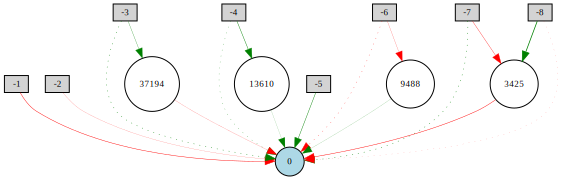

In [12]:
print("\nBest genome:\n{!s}".format(winner_list[0]))

import graphviz
from visualize import draw_net
config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_path,
    )
draw_net(config, winner_list[0])

In [13]:
winner_net = neat.nn.FeedForwardNetwork.create(winner_list[0], config)
outputs = []
for xi, xo in zip(x_inputs, x_outputs):
    output = winner_net.activate(xi)
    outputs.append(output)
    print("input {!r}, expected output {!r}, got {!r}".format(
        xi, xo, output))

input (0.03238341968911917, 0.07124352331606217, 0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667), expected output (0.06476683937823834,), got [0.12892386615643744]
input (0.07124352331606217, 0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834), expected output (0.05181347150259067,), got [0.11751793406090459]
input (0.10362694300518135, 0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834, 0.05181347150259067), expected output (0.019430051813471502,), got [0.1354873289059172]
input (0.1489637305699482, 0.23316062176165794, 0.3756476683937824, 0.1878238341968912, 0.12953367875647667, 0.06476683937823834, 0.05181347150259067, 0.019430051813471502), expected output (0.0,), got [0.1446221511028202]
input (0.23316062176165794, 0.3756476683937824, 0.1878238341

In [14]:
df=pd.read_csv('new_test_X.csv', sep=' ',header=None)
new_test_X = df.values
X_test_inputs = []
for i in range(len(new_test_X)):
    X_test_inputs.append(tuple(new_test_X[i]))

predictions_enn = []
for xi in X_test_inputs:
    output = winner_net.activate(xi)
    predictions_enn.append(output)

#np.savetxt(inputs + 'predictions_enn.csv', np.array(predictions_enn), delimiter=',')
real_y=pd.read_csv('new_test_Y.csv', sep=' ',header=None)
mse = np.sum((np.array(real_y) - predictions_enn)**2)/(len(predictions_enn))
mae = np.average(np.abs(np.array(real_y) - predictions_enn))
print("MSE:", mse)
print("MAE:", mae)

MSE: 0.01566118420571703
MAE: 0.10101894374388992


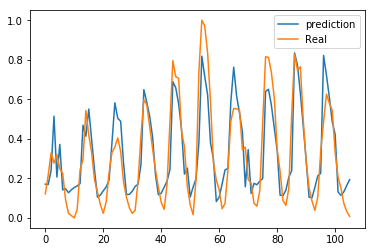

In [15]:
plt.plot(predictions_enn, label = 'prediction')
plt.plot(real_y, label = 'Real')
plt.legend()

In [40]:
net = neat.nn.FeedForwardNetwork.create(p.population[102], config)
for xi, xo in zip(x_inputs, x_outputs):
    output = net.activate(xi)
    print("pred:{} real:{}".format(output,xo))
    print("error:{}, adj error:{}".format(output[0] - xo[0],ad_fit(output[0] - xo[0])))
    #error -= ad_fit(output[0] - xo[0])

pred:[1.4782701533602096] real:(0.5287468233382603,)
error:0.9495233300219493, adj error:673557.0361753132
pred:[1.5239583555435159] real:(0.3112656780778837,)
error:1.2126926774656321, adj error:5594441937.105824
pred:[0.0] real:(0.12351577462940232,)
error:-0.12351577462940232, adj error:0.019179167715482236
pred:[0.9378426943080308] real:(0.15446949737954024,)
error:0.7833731969284905, adj error:6104.682268798438
pred:[0.0] real:(0.4671608643332532,)
error:-0.4671608643332532, adj error:5.762813801866517
pred:[0.0] real:(0.37850883451375716,)
error:-0.37850883451375716, adj error:1.2287560744043948
pred:[0.0] real:(0.016213595059167245,)
error:-0.016213595059167245, adj error:0.00026391930484327697
pred:[0.0] real:(0.5209752110142865,)
error:-0.5209752110142865, adj error:15.912769838690728
pred:[0.0] real:(0.08909815998130449,)
error:-0.08909815998130449, adj error:0.008942358054562236
pred:[1.1745414133357759] real:(0.36615604948972946,)
error:0.8083853638460464, adj error:11811.9

error:-0.6226437354040378, adj error:130.02370298250622
pred:[1.3469632641435192] real:(0.4985923414810972,)
error:0.848370922662422, adj error:35140.99498541058
pred:[0.0] real:(0.1322894990248645,)
error:-0.1322894990248645, adj error:0.022753927897820967
pred:[0.0] real:(0.13731064811380986,)
error:-0.13731064811380986, adj error:0.02501685153270118
pred:[1.3827329871748701] real:(0.2739764883608877,)
error:1.1087564988139824, adj error:125346547.2053472
pred:[0.0] real:(0.46841450378326177,)
error:-0.46841450378326177, adj error:5.896617278676763
pred:[0.0] real:(0.5877350405695168,)
error:-0.5877350405695168, adj error:61.468760159446155
pred:[0.8362148649094795] real:(0.4546124549983593,)
error:0.3816024099111202, adj error:1.2937615951875072
pred:[0.6621299649050486] real:(0.08410208142340292,)
error:0.5780278834816457, adj error:50.17300689995139
pred:[0.0] real:(0.29385771450461373,)
error:-0.29385771450461373, adj error:0.3153620798255751
pred:[0.0] real:(0.10052702294811051,

pred:[0.31102069266040944] real:(0.0518281154274736,)
error:0.2591925772329358, adj error:0.1840300861830067
pred:[0.880758716430701] real:(0.12603578437806065,)
error:0.7547229320526404, adj error:2925.7069228558817
pred:[2.304135148705832] real:(0.5019144737030878,)
error:1.8022206750027443, adj error:4.682081115673313e+21
pred:[0.0] real:(0.4517640171499576,)
error:-0.4517640171499576, adj error:4.3586843838407985
pred:[0.0] real:(0.4676949743349891,)
error:-0.4676949743349891, adj error:5.8194218346302256
pred:[1.188318560109841] real:(0.17446290486004654,)
error:1.0138556552497944, adj error:5106733.043775758
pred:[2.1958230767186517] real:(0.6745255689825751,)
error:1.5212975077360766, adj error:2760860479924632.0
pred:[0.0] real:(0.5317590526551411,)
error:-0.5317590526551411, adj error:19.656061217459026
pred:[0.0] real:(0.40646778142632495,)
error:-0.40646778142632495, adj error:1.9694210904068576
pred:[1.7802114696468623] real:(0.39268642746510507,)
error:1.3875250421817573, 

In [54]:
for i in range(1):
    print(i)
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    for each in p.population:
        print(each,p.population[each].fitness)
        visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(i,each), fmt="jpg")

0
56 -0.10753527109183335
101 None
102 None
103 None
104 None
105 None
106 None
107 None
108 None
109 None
110 None
111 None
112 None
113 None
114 None
115 None
116 None
117 None
118 None
119 None
120 None
121 None
122 None
123 None
124 None
125 None
126 None
127 None
128 None
129 None
130 None
131 None
132 None
133 None
134 None
135 None
26 -0.06783252455099581
136 None
137 None
138 None
139 None
140 None
141 None
142 None
143 None
144 None
145 None
146 None
147 None
148 None
149 None
150 None
151 None
152 None
153 None
154 None
155 None
156 None
157 None
158 None
159 None
160 None
161 None
162 None
163 None
164 None
165 None
166 None
167 None
168 None
169 None
170 None
171 None
172 None
173 None
174 None
175 None
176 None
177 None
178 None
179 None
180 None
181 None
182 None
183 None
184 None
185 None
186 None
187 None
188 None
189 None
190 None
191 None
192 None
193 None
194 None
195 None
196 None
197 None
198 None


In [55]:
filenames = []
previous_id = 0
number_of_ids = 0
for i in range(2):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    for each in p.population:
        #print(p.population[each])
        visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(i,each), fmt="jpg")

In [30]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(0))

for each in p.population:
    visualize.draw_net(config, p.population[each], False, filename='square2every/{}/{}'.format(0,each), fmt="jpg")

In [ ]:
visualize.draw_net(config, p.population[best_id], False, filename='rastrigin2_diff/'+str(number_of_ids), fmt="jpg")

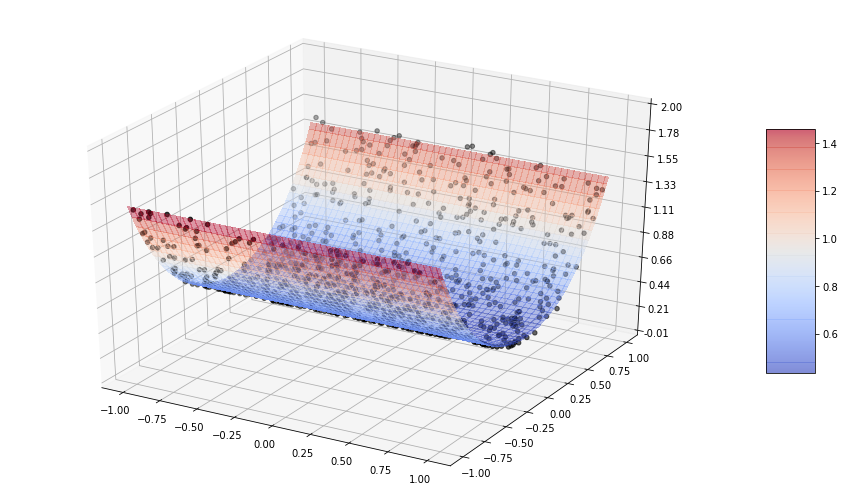

In [76]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize = (16,9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-1, 1, 0.02)
Y = np.arange(-1, 1, 0.02)
X, Y = np.meshgrid(X, Y)

OZ = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        a = np.array([X[i][j],Y[i][j]])
        OZ.append(winner_net.activate(tuple(a)))
OZ = np.array(OZ).reshape(X.shape)

Z = OZ*2
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.4)

# Customize the z axis.
ax.set_zlim(-0.01, 2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

outputs = []
for xi in x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)

x = []
y = []
z = []
for i in range(1000):
    x.append(x_inputs[i][0])
    y.append(x_inputs[i][1])
    z.append(outputs[i][0]*2)

ax.scatter(x, y, z, c='k', marker='o')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [62]:
xi = tuple([0,0])
xo = [tuple([0])]
output = winner_net.activate(xi)
print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output[0]))

input (0, 0), expected output [(0,)], got 0.31508827719592414


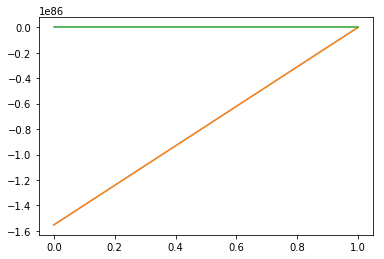

In [10]:
avg_fitness_list = []
best_list = []

for i in range(1):
    generation = range(len(stats_list[i].get_fitness_mean()))
    avg_fitness = np.array(stats_list[i].get_fitness_mean())
    avg_fitness_list.append(avg_fitness)
    best_fitness = [c.fitness for c in stats_list[i].most_fit_genomes]
    best_list.append(best_fitness)

    plt.plot(generation, avg_fitness, alpha = 0.4)
    #plt.plot(generation, best_fitness, alpha = 0.4)

plt.plot(generation, np.average(np.array(avg_fitness_list),axis = 0), label="Average")
plt.plot(generation, np.average(np.array(best_list),axis = 0), label="Best")


plt.show()

In [36]:
def find_best_id(p):
    fitness_list = [] 
    for i in p.population:
        fitness = p.population[i].fitness
        if fitness != None:
            fitness_list.append(fitness)
        else:
            fitness_list.append(float("-inf"))
    #print(len(fitness_list))
    index = fitness_list.index(max(fitness_list))
    best_id = list(p.population.keys())[index]
    return best_id

In [37]:
filenames = []
previous_id = 0
number_of_ids = 0
for i in range(100):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i*10+9))
    best_id = find_best_id(p)
    if best_id != previous_id:
        print(best_id,p.population[best_id].fitness)
        previous_id = best_id
        number_of_ids += 1
        visualize.draw_net(config, p.population[best_id], False, filename='rastrigin2_diff/'+str(number_of_ids), fmt="jpg")
    # visualize.draw_net(config, p.population[best_id], False, filename=str(i))
    filenames.append('rastrigin2/'+str(i)+'.jpg')

738 -0.033509559449906925
1501 -0.031583252189696744
2748 -0.03139439378067297
4835 -0.030960564521020698
7175 -0.030750278761816283
7264 -0.030303181190576563
13099 -0.03026106129191053
18357 -0.03019326342914568
30356 -0.03000206519245573
32195 -0.0299823371902721
37008 -0.029981003740106805
44165 -0.02932885247127812
52722 -0.025398689940641747
59085 -0.0253865315306116
69191 -0.02506501640022899
91403 -0.0248860601164877


In [17]:
config.genome_config.input_keys

list